In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
import requests


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
#import all the necessary liabriries requried if needed with insert mor

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df.shape
#7752 rows and 25 coumns

(7752, 25)

In [4]:
df.info()
#except date all the others columns are float only 
#date will change it 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
# changing the datatype of date column 
df["Date"] = pd.to_datetime(df["Date"])


# Converting Date datatypes and spliting date into date, month and year.
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin   Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2  30.0   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5  30.0   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9  30.0   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3  30.0   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5  30.0   

   Month    Year  
0    6.0  2013.0  
1    6.0  2013.0  
2    6.0  2013.0  
3    6.0  2013.0  
4    6.0  2013.0  

[5 rows x 28 columns]

In [6]:
df.columns
#columns names

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day',
       'Month', 'Year'],
      dtype='object')

In [7]:
df.isnull().sum()
#there are many null values in data set except few columns
#will trest them later

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

In [8]:
df.describe().T

count         mean         std          min          25%  \
station           7750.0    13.000000    7.211568     1.000000     7.000000   
Present_Tmax      7682.0    29.768211    2.969999    20.000000    27.800000   
Present_Tmin      7682.0    23.225059    2.413961    11.300000    21.700000   
LDAPS_RHmin       7677.0    56.759372   14.668111    19.794666    45.963543   
LDAPS_RHmax       7677.0    88.374804    7.192004    58.936283    84.222862   
LDAPS_Tmax_lapse  7677.0    29.613447    2.947191    17.624954    27.673499   
LDAPS_Tmin_lapse  7677.0    23.512589    2.345347    14.272646    22.089739   
LDAPS_WS          7677.0     7.097875    2.183836     2.882580     5.678705   
LDAPS_LH          7677.0    62.505019   33.730589   -13.603212    37.266753   
LDAPS_CC1         7677.0     0.368774    0.262458     0.000000     0.146654   
LDAPS_CC2         7677.0     0.356080    0.258061     0.000000     0.140615   
LDAPS_CC3         7677.0     0.318404    0.250362     0.000000     0.101388   
LDAPS_CC4         7677.0     0.299191    0.254348     0.000000     0.081532   
LDAPS_PPT1        7677.0     0.591995    1.945768     0.000000     0.000000   
LDAPS_PPT2        7677.0     0.485003    1.762807     0.000000     0.000000   
LDAPS_PPT3        7677.0     0.278200    1.161809     0.000000     0.000000   
LDAPS_PPT4        7677.0     0.269407    1.206214     0.000000     0.000000   
lat               7752.0    37.544722    0.050352    37.456200    37.510200   
lon               7752.0   126.991397    0.079435   126.826000   126.937000   
DEM               7752.0    61.867972   54.279780    12.370000    28.700000   
Slope             7752.0     1.257048    1.370444     0.098475     0.271300   
Solar radiation   7752.0  5341.502803  429.158867  4329.520508  4999.018555   
Next_Tmax         7725.0    30.274887    3.128010    17.400000    28.200000   
Next_Tmin         7725.0    22.932220    2.487613    11.300000    21.300000   
Day               7750.0    16.370968    8.241331     7.000000     8.000000   
Month             7750.0     7.080645    2.238364     1.000000     7.000000   
Year              7750.0  2015.000000    1.414305  2013.000000  2014.000000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.900000    29.900000  
LDAPS_RHmin         55.039024    67.190056    98.524734  
LDAPS_RHmax         89.793480    93.743629   100.000153  
LDAPS_Tmax_lapse    29.703426    31.710450    38.542255  
LDAPS_Tmin_lapse    23.760199    25.152909    29.619342  
LDAPS_WS             6.547470     8.032276    21.857621  
LDAPS_LH            56.865482    84.223616   213.414006  
LDAPS_CC1            0.315697     0.575489     0.967277  
LDAPS_CC2            0.312421     0.558694     0.968353  
LDAPS_CC3            0.262555     0.496703     0.983789  
LDAPS_CC4            0.227664     0.499489     0.974710  
LDAPS_PPT1           0.000000     0.052525    23.701544  
LDAPS_PPT2           0.000000     0.018364    21.621661  
LDAPS_PPT3           0.000000     0.007896    15.841235  
LDAPS_PPT4           0.000000     0.000041    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178230  
Solar radiation   5436.345215  5728.316406  5992.895996  
Next_Tmax           30.500000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000  
Day                 16.000000    24.000000    31.000000  
Month                7.000000     8.000000    12.000000  
Year              2015.000000  2016.000000  2017.000000

In [9]:
#some column has high spread and some of the columns's std is close to mean like present_Tmax has low standard deviation and some of the columns have high spread like LDAPS_LH.
#couple of columns have 0 min value, median and 25th Percentile
#missing value in target columns also
#we will impute them with mean as max values comes under 3rd standard deviation hence for extreme values

In [10]:
df.duplicated().sum()
#This will check if any duplicate entry or duplicate row with same value exist

0

In [11]:
df.isin([' ','NA','-']).sum().any()
#No Duplicate entry in dataset.
#No whitespace, NA, '-' exist in dataset.

False

In [12]:
# we will fill station and date with mode as station is a categorical type and date is datetime and rest all will be filled with mean

df["station"] =  df["station"].fillna(df["station"].mode()[0])
df["Date"] = df["Date"].fillna(df["Date"].mode()[0])

In [13]:
# filling other columns with new method

for i in df.iloc[:,2::].columns:
    df[i] = df[i].fillna(df[i].mean())

In [14]:
df.isnull().sum()
#look there is no missing value now in dataset

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

array([[<AxesSubplot:title={'center':'station'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Present_Tmax'}>,
        <AxesSubplot:title={'center':'Present_Tmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmin'}>],
       [<AxesSubplot:title={'center':'LDAPS_RHmax'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmax_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmin_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_WS'}>,
        <AxesSubplot:title={'center':'LDAPS_LH'}>],
       [<AxesSubplot:title={'center':'LDAPS_CC1'}>,
        <AxesSubplot:title={'center':'LDAPS_CC2'}>,
        <AxesSubplot:title={'center':'LDAPS_CC3'}>,
        <AxesSubplot:title={'center':'LDAPS_CC4'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT1'}>],
       [<AxesSubplot:title={'center':'LDAPS_PPT2'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT3'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT4'}>,
        <AxesSubplot:title={'center':'lat'

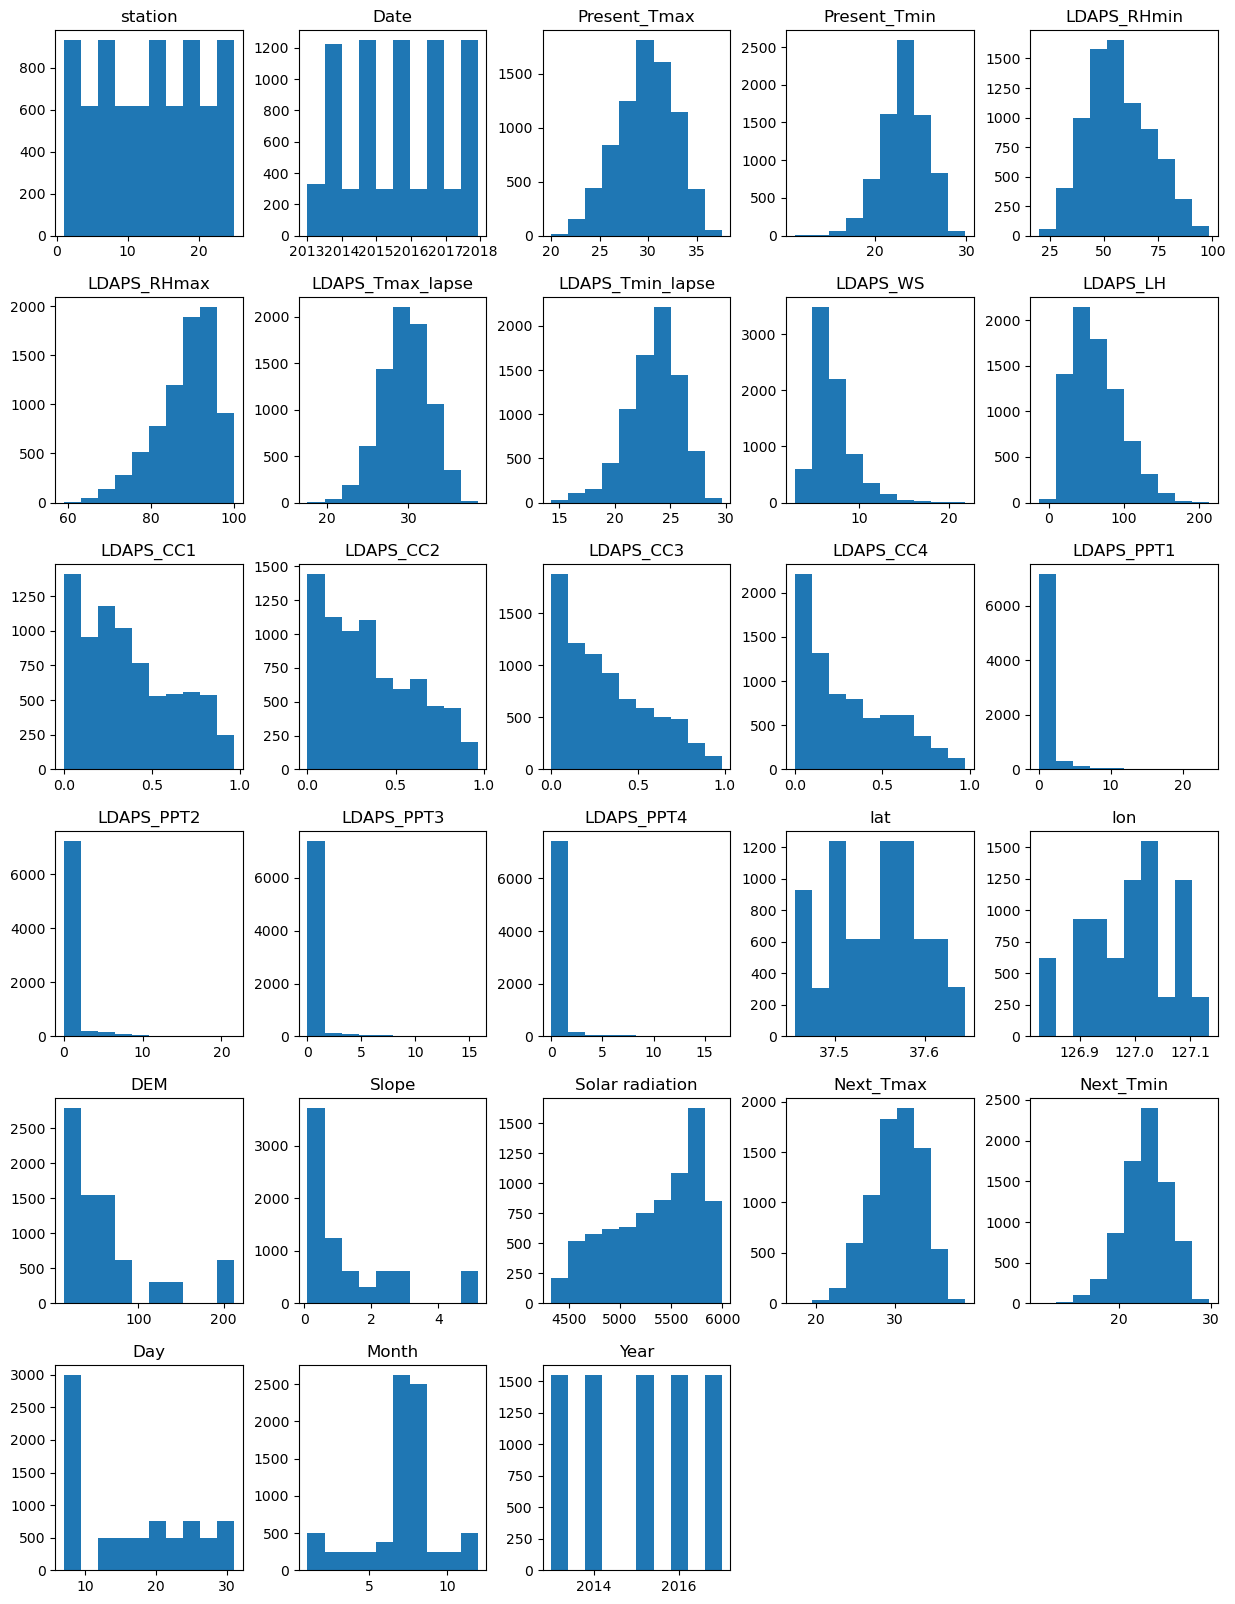

In [15]:
#will do EDA

df.hist(figsize=(15,20),grid=False)
#present TMIN and TMAX are close to normal distribution and rest are all skewed, we will check the skewness and correct them

In [16]:
very_low_scale =[] 
for i in df.iloc[:,2::].columns:
    if df[i].max() <1:
        very_low_scale.append(df[i])

<AxesSubplot:>

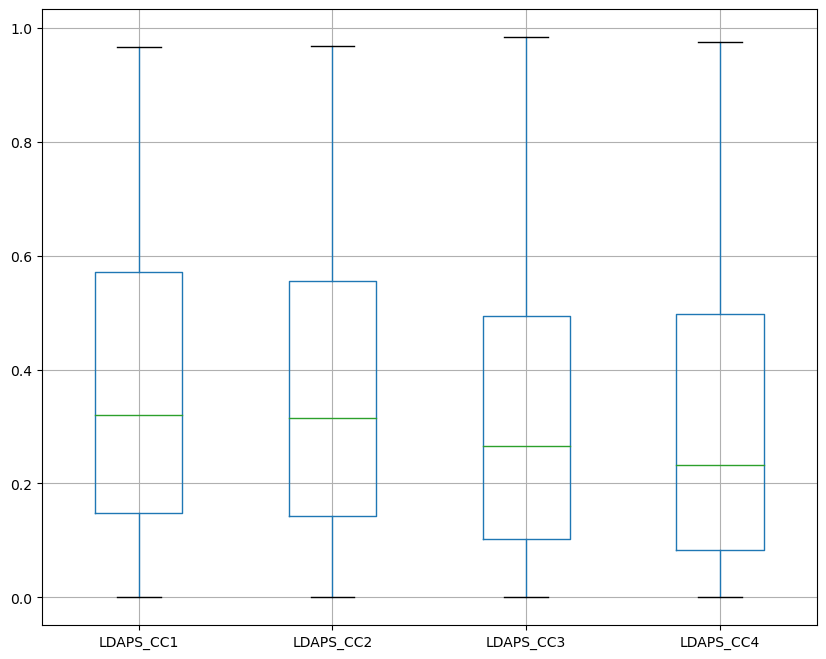

In [17]:
very_low_scale = pd.DataFrame(very_low_scale)
very_low_scale = very_low_scale.T
very_low_scale.boxplot(figsize = (10,8), grid = True)
#These features dont have outliers

In [18]:
scale =[] 
for i in df.iloc[:,2::].columns:
    if df[i].max() >1 and df[i].max() <20:
        scale.append(df[i])

<AxesSubplot:>

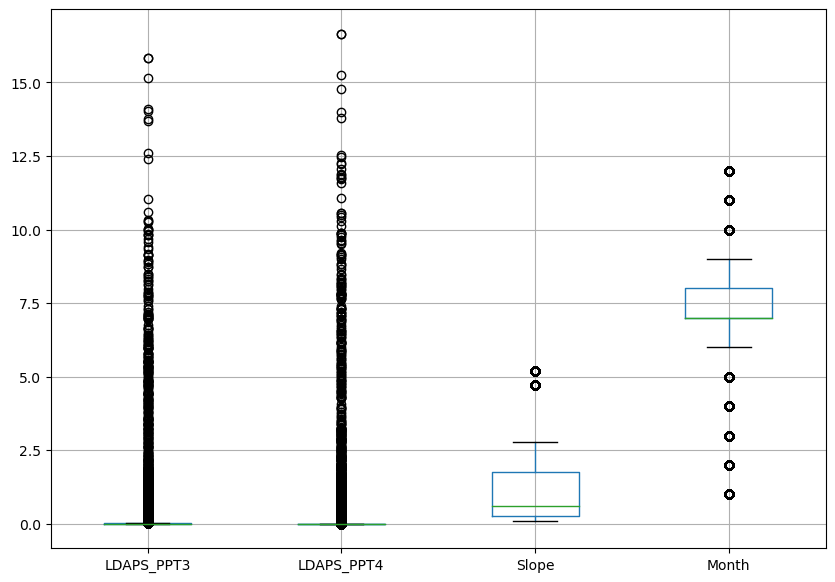

In [19]:
scale = pd.DataFrame(scale)
scale = scale.T
scale.boxplot(figsize = (10,7), grid = True)
#we see outliers in these features

In [20]:
scale =[] 
for i in df.iloc[:,2::].columns:
    if df[i].max() >20 and df[i].max() <40:
        scale.append(df[i])

<AxesSubplot:>

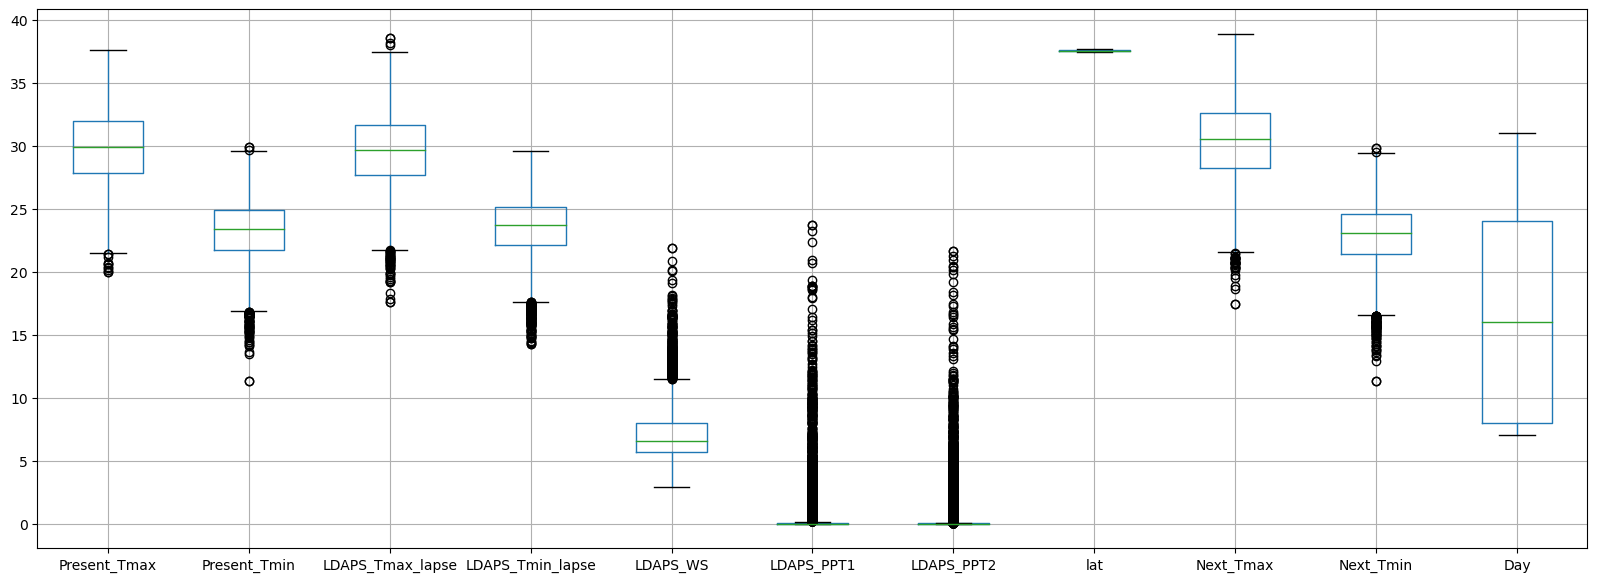

In [21]:
scale = pd.DataFrame(scale)
scale = scale.T
scale.boxplot(figsize = (20,7), grid = True)
#we see outliers in these features

<AxesSubplot:>

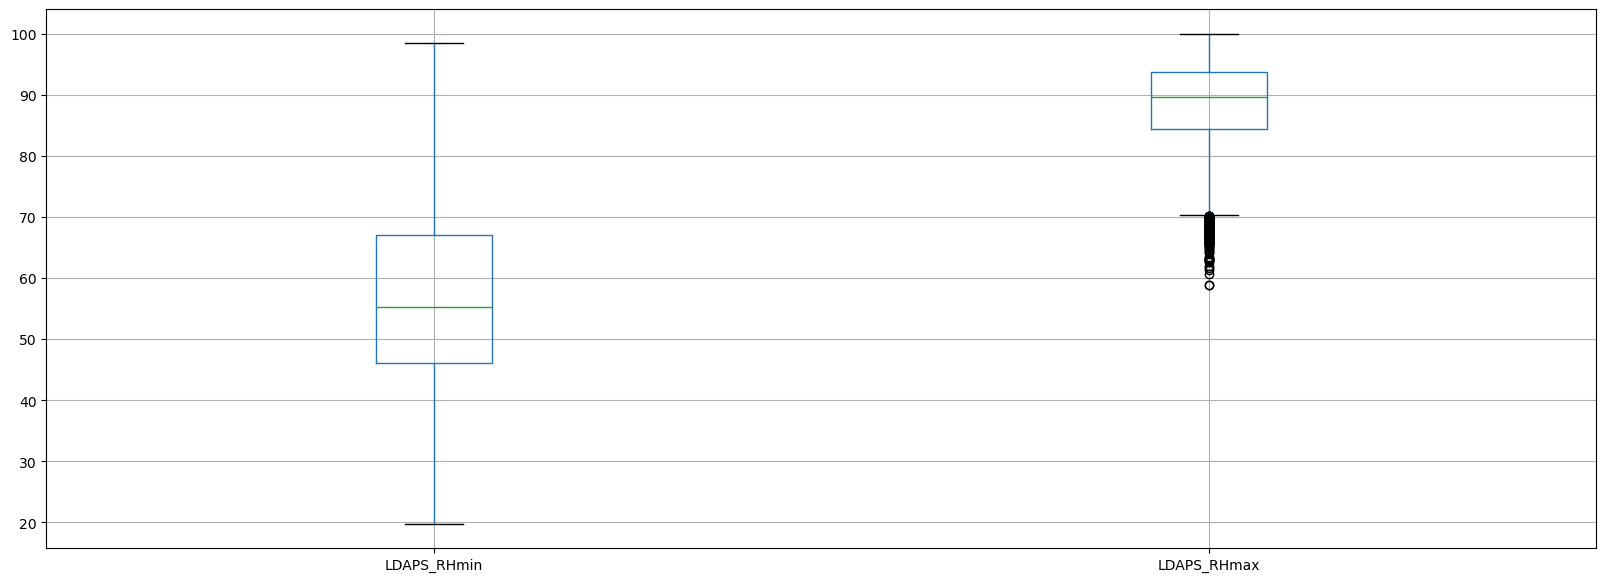

In [22]:
scale =[] 
for i in df.iloc[:,2::].columns:
    if df[i].max() >80 and df[i].max() <120:
        scale.append(df[i])
scale = pd.DataFrame(scale)
scale = scale.T
scale.boxplot(figsize = (20,7), grid = True)
#we see outliers in these features        

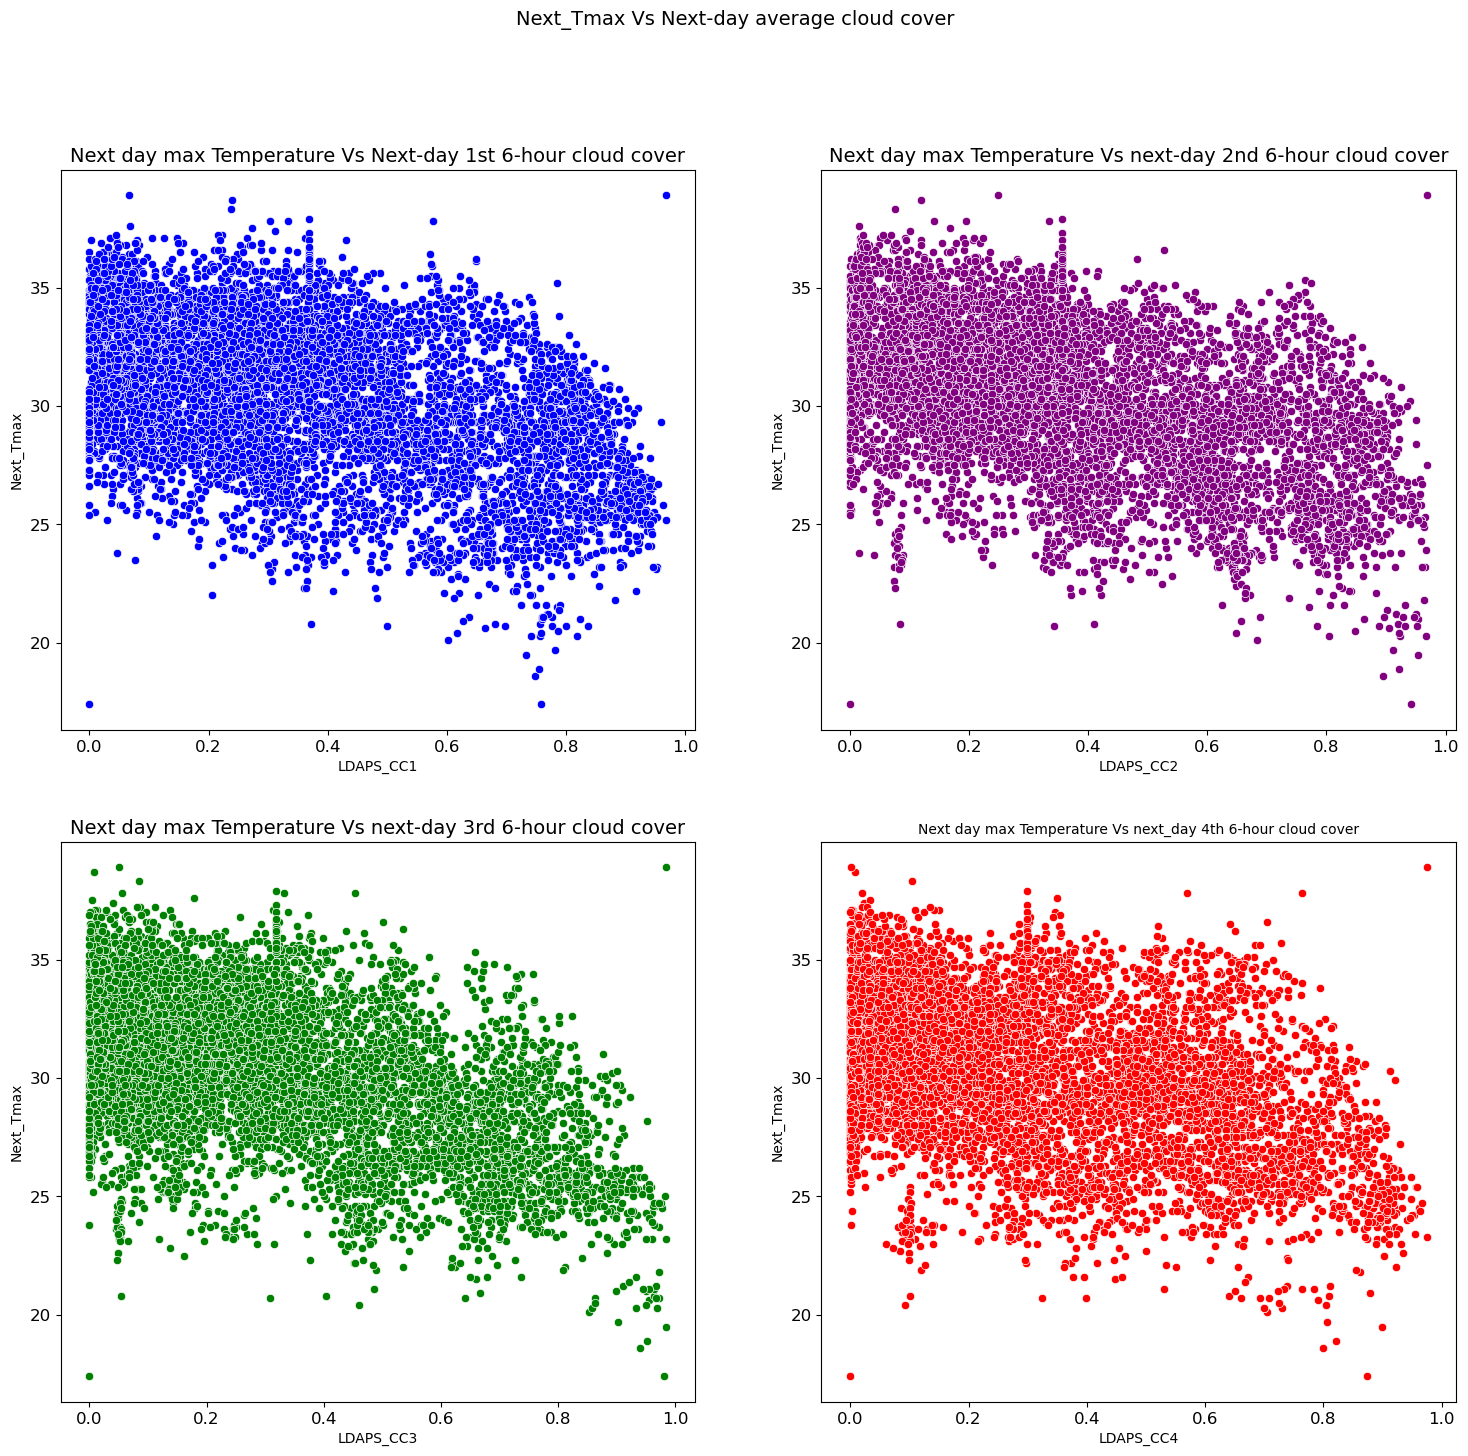

In [23]:
# Comparing Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14)

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=10)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



#rrespective of 6 hr quarter in 24 hr day time, Next-day Temperature Maximum decreases as cloud cover increases beyond 0.6.

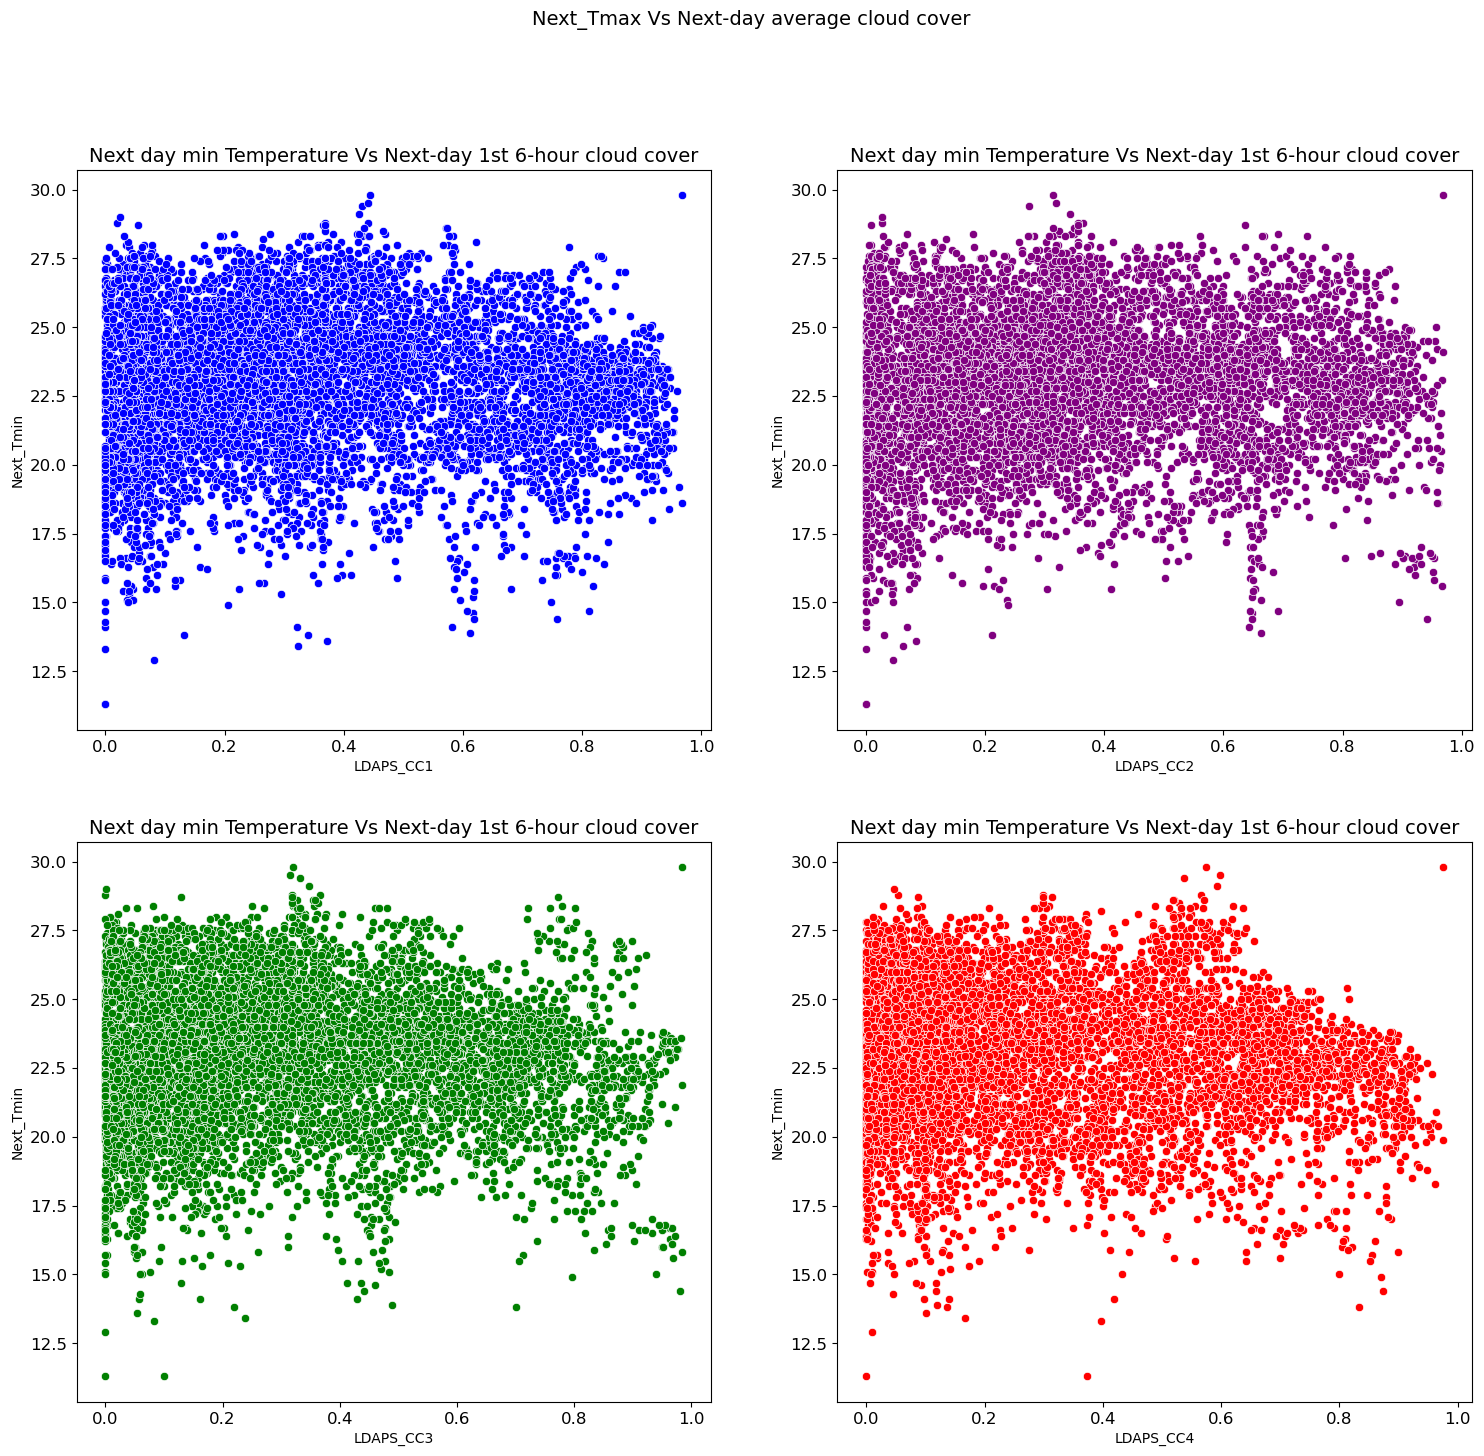

In [24]:
# Comparing Next day min  temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14)

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="blue")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='green')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="red")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#We can say that Next_Tmin remains unaffected by cloud cover.

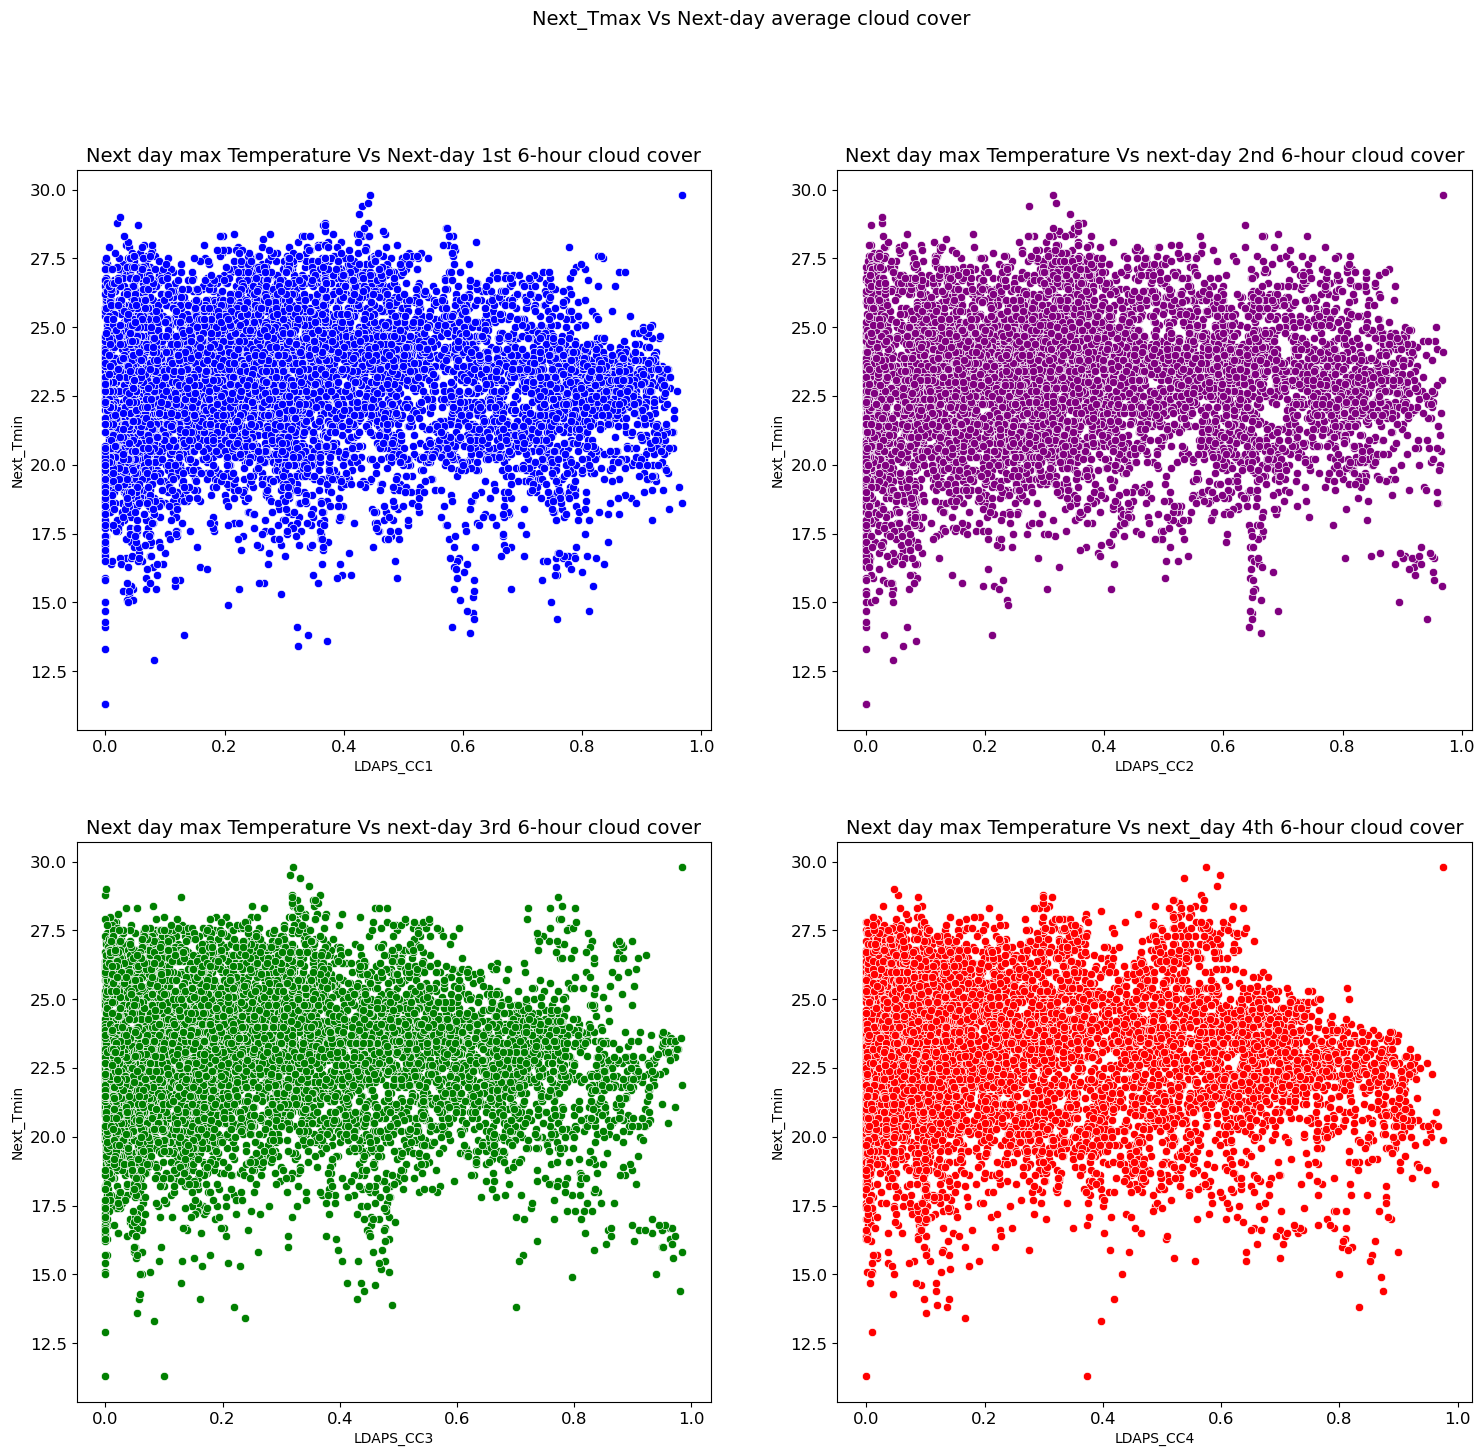

In [25]:
#Solar radiation might most impact on Cloud cover and precipitation, its time to explore them.
plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14)

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="blue")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='green')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="red")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

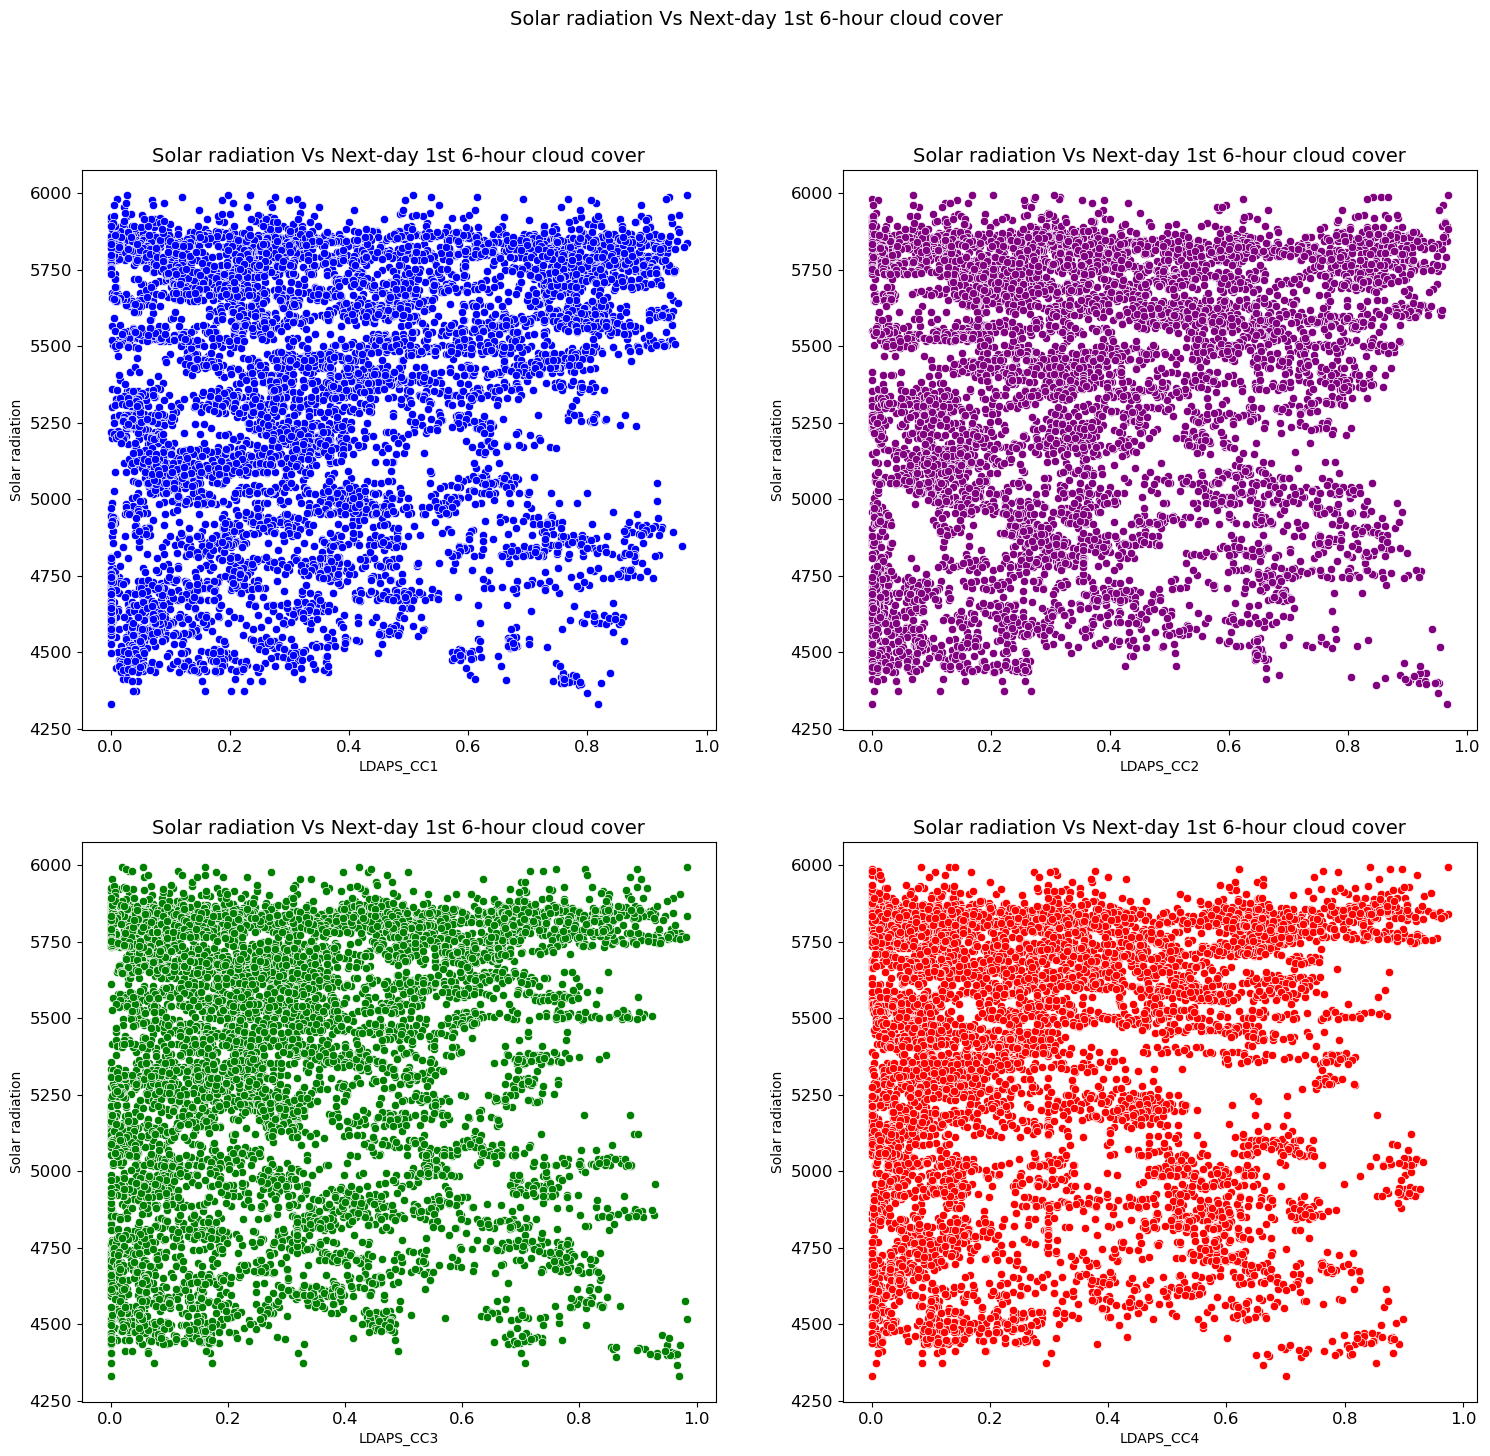

In [26]:
# Solar radiation Vs Next-day 1st 6-hour cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14)

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="blue")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,2)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,3)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='green')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,4)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="red")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#We can definitely say that for cloud cover greater than 0.7 high value solar radiation contributed most.

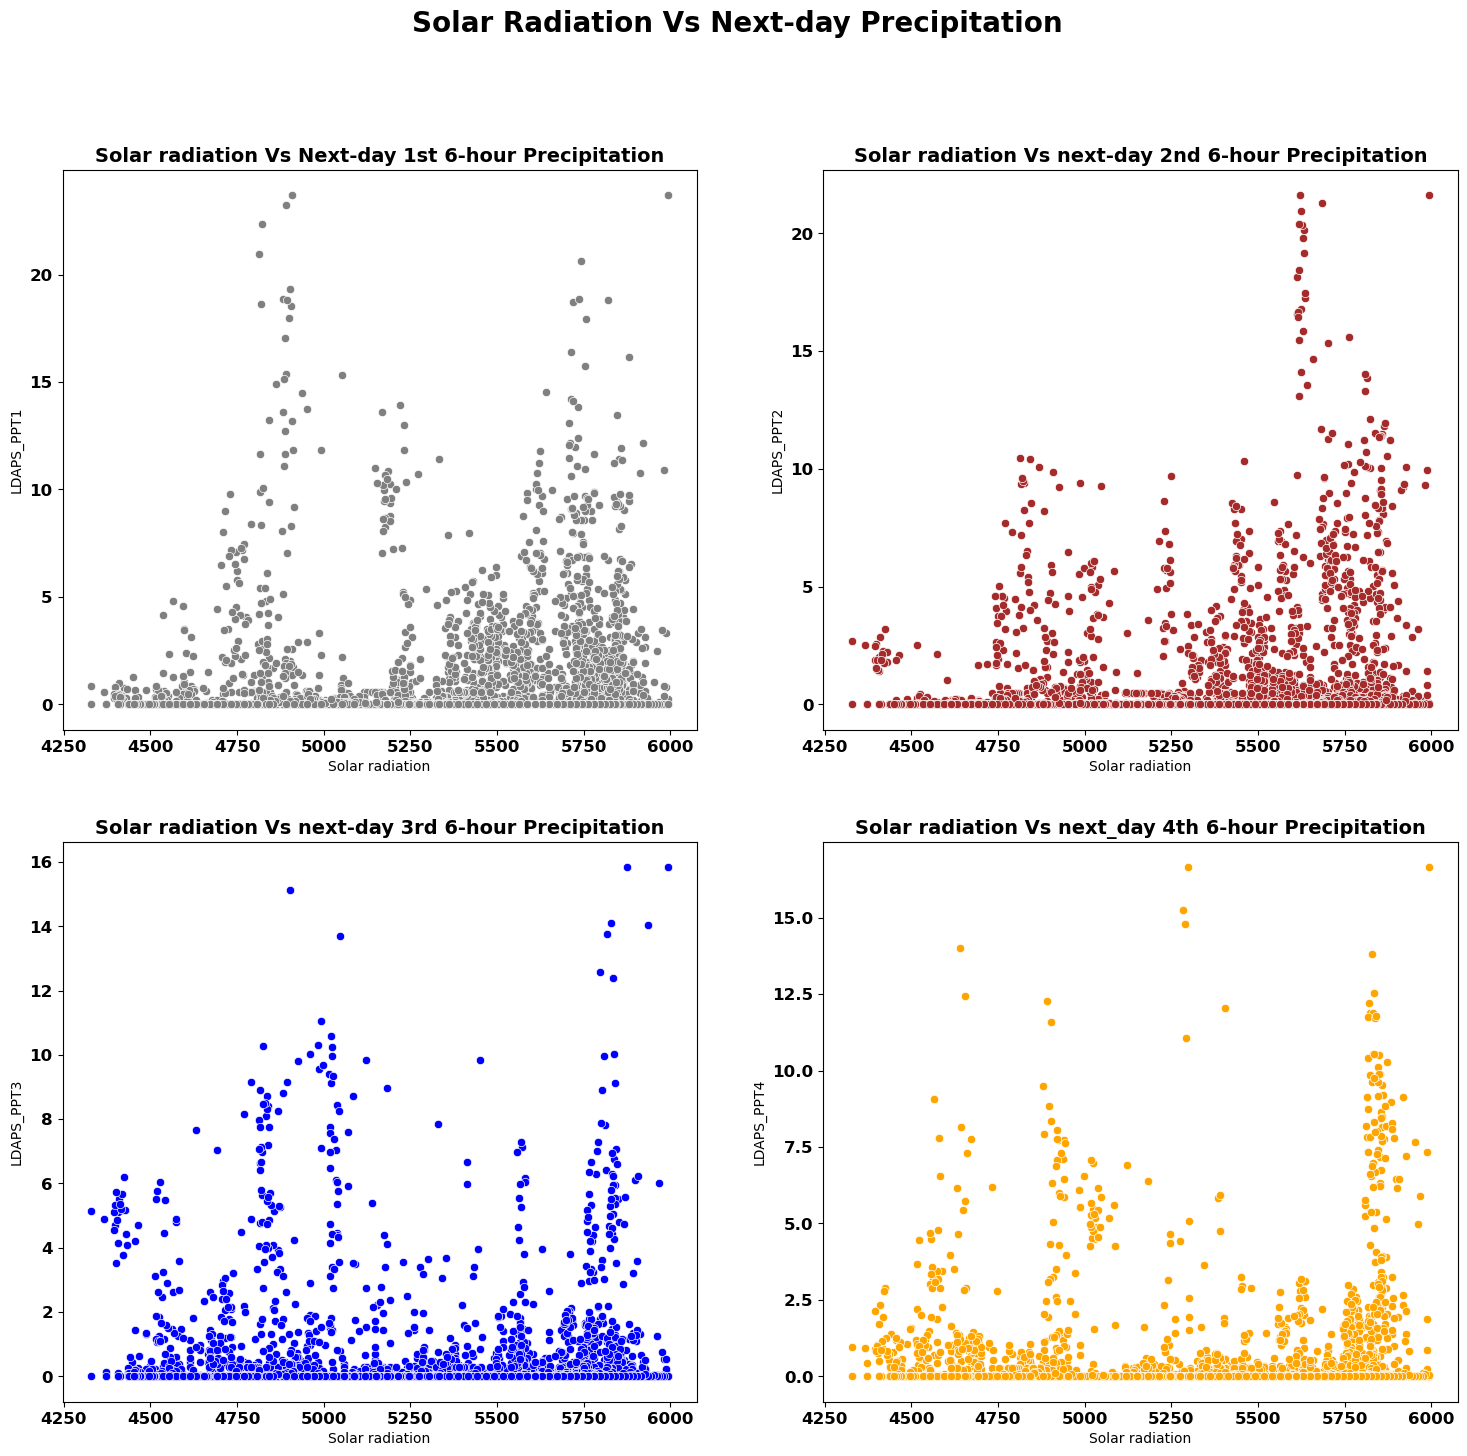

In [27]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

In [28]:
# solar radiation value greater than 5500w/m2 leads to higher amount of precipitation.

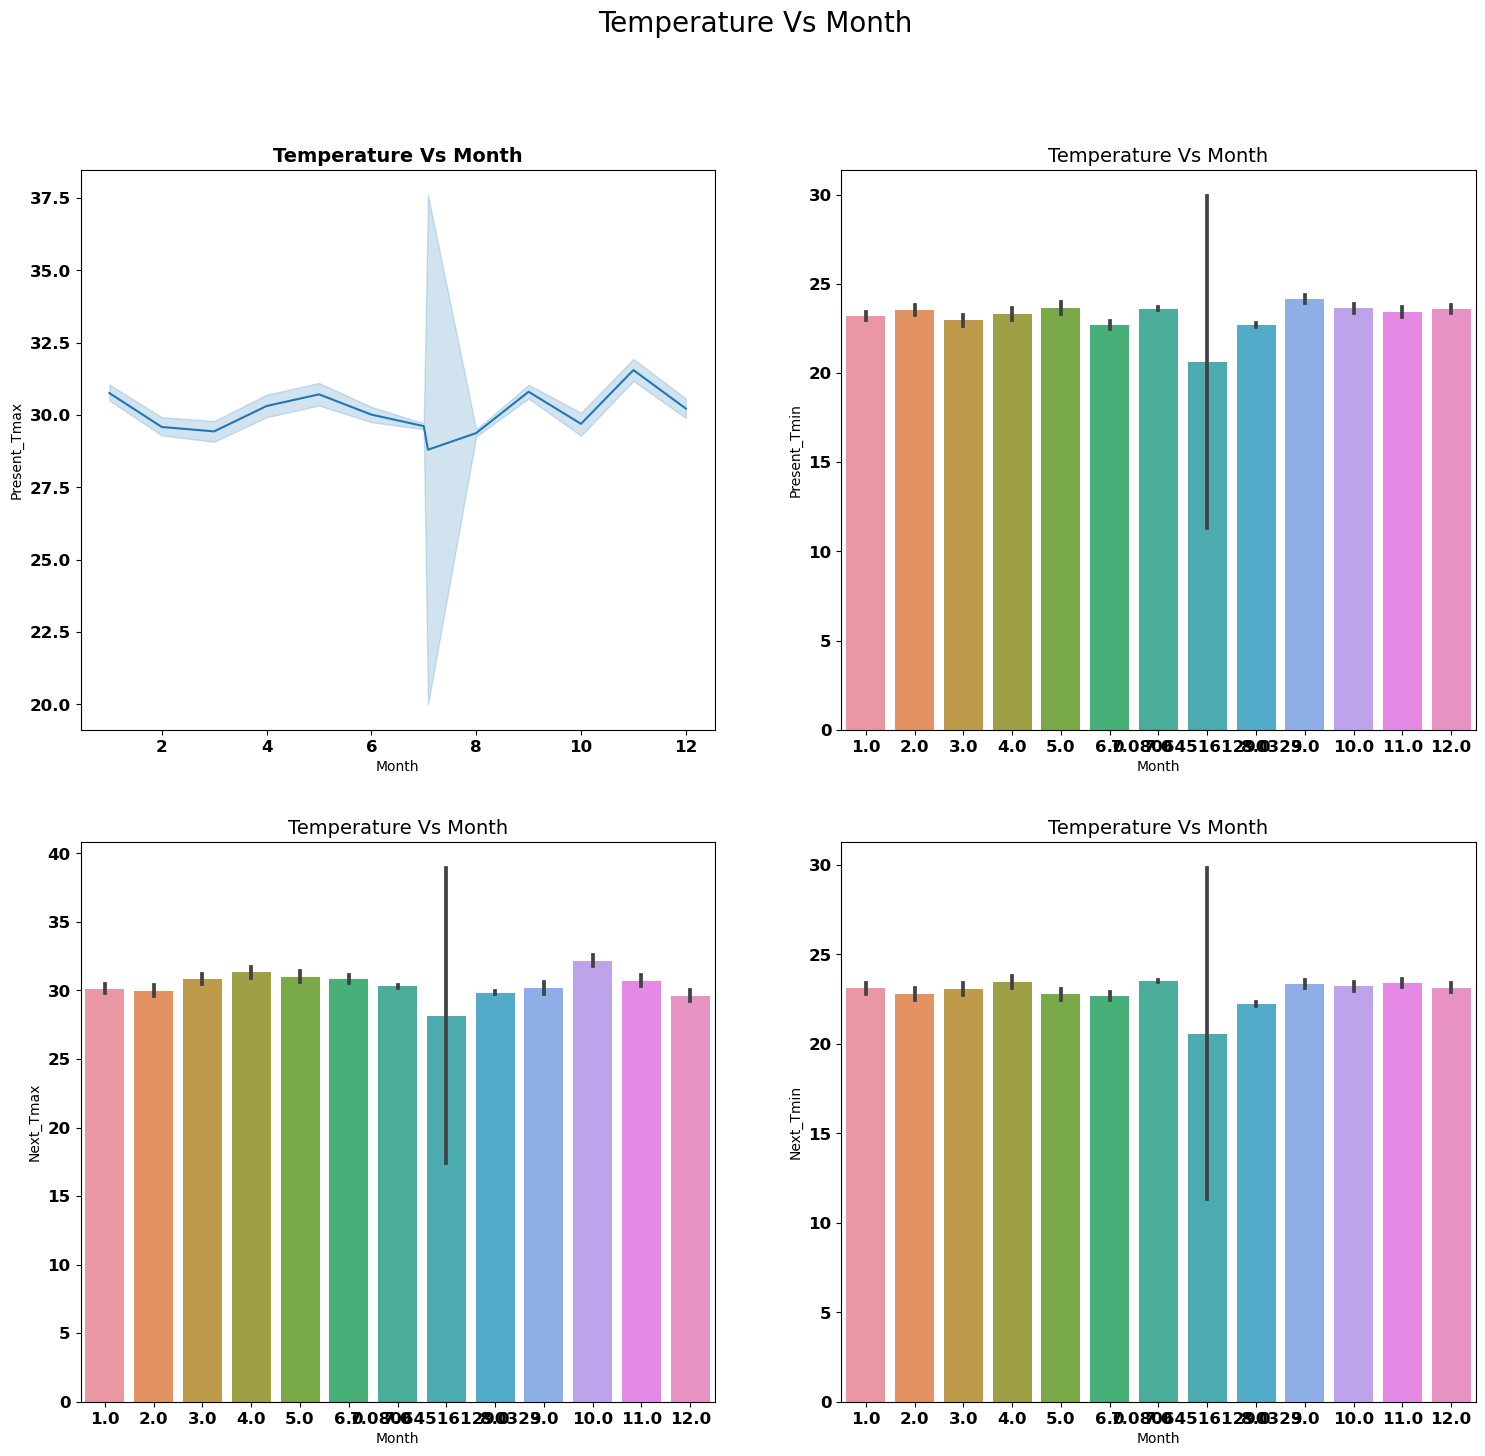

In [29]:

# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20)

plt.subplot(2,2,1)
plt.title('Temperature Vs Month',fontsize=14,fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=df)
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Temperature Vs Month',fontsize=14)
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Temperature Vs Month',fontsize=14)
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Temperature Vs Month',fontsize=14)
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5341.50280266135


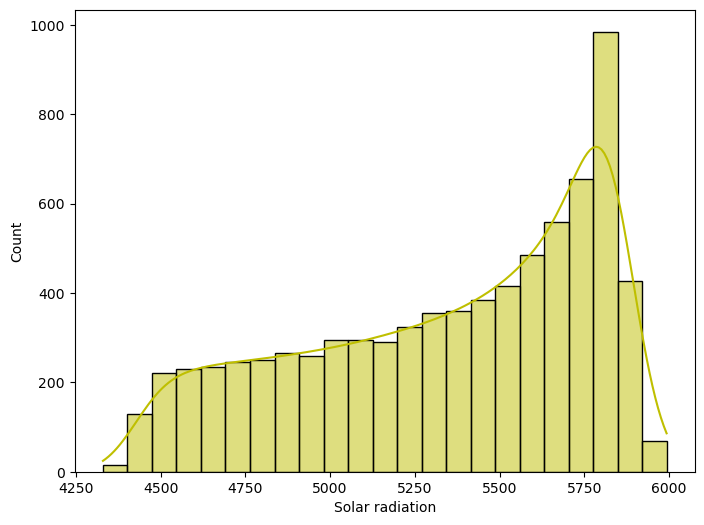

In [30]:

plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

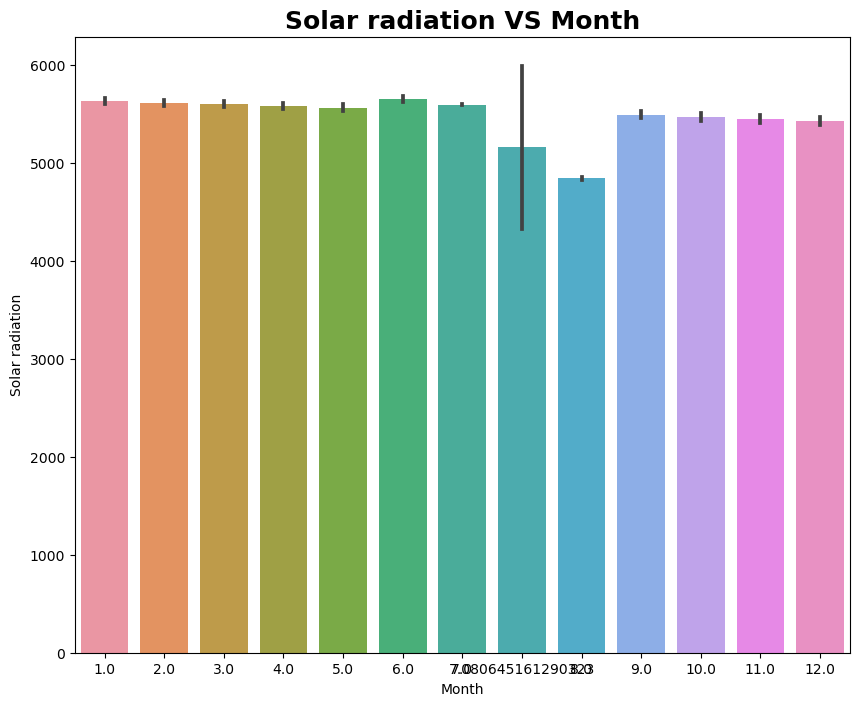

In [31]:

plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

In [32]:
#Solar Radiation data is left skewed.
#It has its minimum value at 4329.52 Wh/m2 and maximum values at 5992.89 Wh/m2.
#For most of reading solar radiation values lies in the range 5600 to 5850.
#Minimum solar radiation occur in month of 8.

MinimumWind Speed : 4329.520508
Maximum Wind Speed : 5992.895996
Average Wind Speed : 5341.50280266135


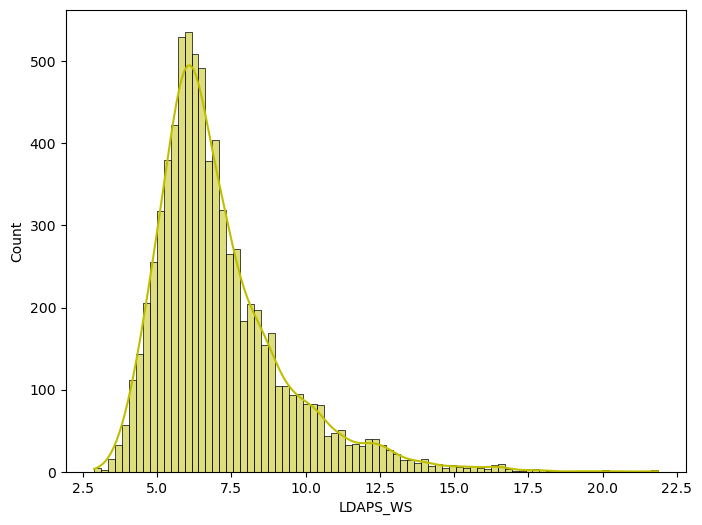

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='y')
print('MinimumWind Speed :',df['Solar radiation'].min())
print('Maximum Wind Speed :',df['Solar radiation'].max())
print('Average Wind Speed :',df['Solar radiation'].mean())

In [34]:
#It have its minimum value at 2.88m/s and maximum values at 21.85m/s
#For most of reading values lies in the rabge 5m/s to 8m/s
#Graph is slightly right skewed.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Count'>

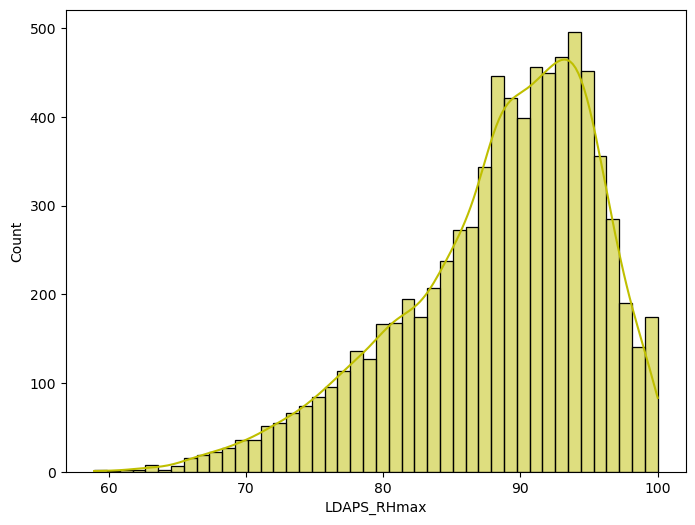

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_RHmax'],kde=True,color='y')
#LDAPS_RHmax maximum


<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

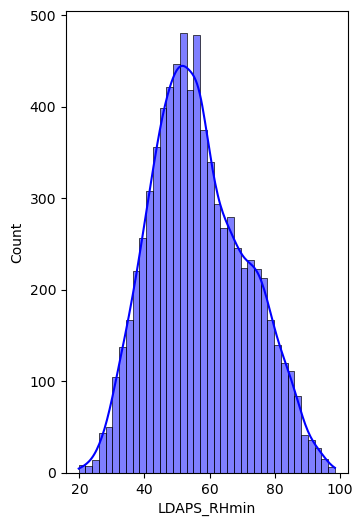

In [36]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')

#LDAPS_RHmin minimum

In [37]:
#Data of Maximum Relative humidity is left skewed and Data of Minimum Relative humidity is slightly right skewed.
#Maximum Relative humidity for most of the days lie in the range 90 to 97
#Maximum Relative humidity lies in the range 45 to 62.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Count'>

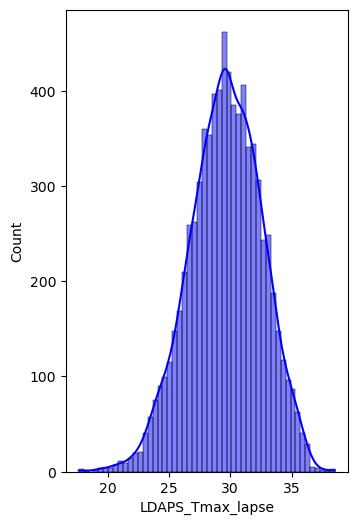

In [38]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='b')

#LDAPS_Tmax_lapse maximum

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

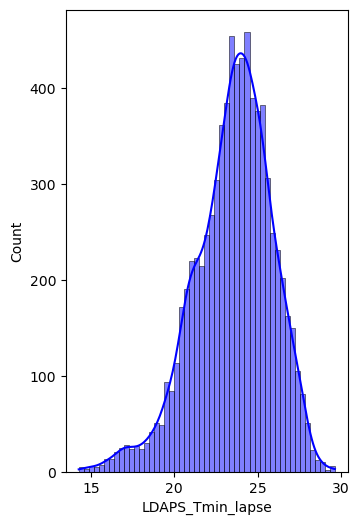

In [39]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='b')

#LDAPS_Tmin_lapse minimum


In [40]:
#Tmax and Tmin for applied lapse rate are almost normally distributed.
#Tmax_lapse for majority of days its values lies in the range 27 to 33 .
#Tmin_lapse for majority of days its values lies in the range 23 to 26

Text(0.5, 1.0, 'Next day average Latent Heat Flux')

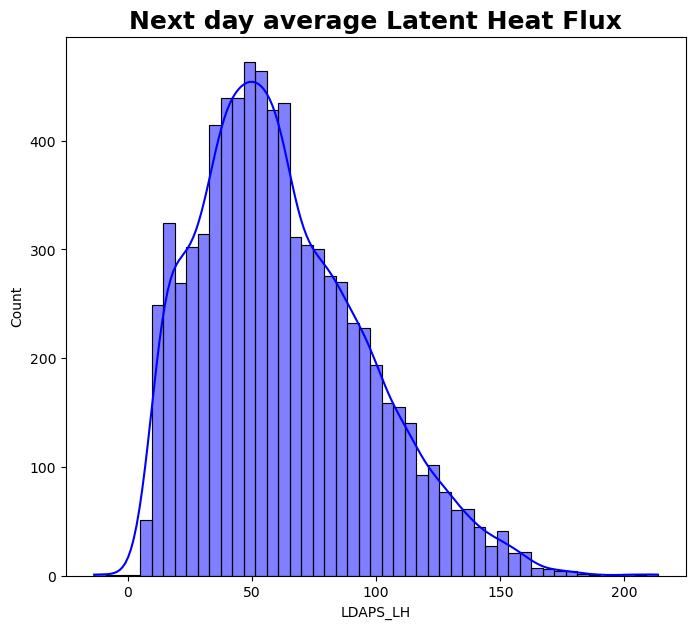

In [41]:

plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
#'Next day average Latent Heat Flux'

In [42]:
df

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0 2013-06-30          28.7          21.4    58.255688   
1         2.0 2013-06-30          31.9          21.6    52.263397   
2         3.0 2013-06-30          31.6          23.3    48.690479   
3         4.0 2013-06-30          32.0          23.4    58.239788   
4         5.0 2013-06-30          31.4          21.9    56.174095   
...       ...        ...           ...           ...          ...   
7747     23.0 2017-08-30          23.3          17.1    26.741310   
7748     24.0 2017-08-30          23.3          17.7    24.040634   
7749     25.0 2017-08-30          23.2          17.4    22.933014   
7750      1.0 2013-01-07          20.0          11.3    19.794666   
7751      1.0 2013-01-07          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...      lat      lon       DEM     Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.785000      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.514100      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.266100      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.534800      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.505500      5859.552246       31.2   
...   ...      ...      ...       ...       ...              ...        ...   
7747  ...  37.5372  126.891   15.5876  0.155400      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.222300      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.271300      4451.345215       27.8   
7750  ...  37.4562  126.826   12.3700  0.098475      4329.520508       17.4   
7751  ...  37.6450  127.135  212.3350  5.178230      5992.895996       38.9   

      Next_Tmin        Day     Month    Year  
0          21.2  30.000000  6.000000  2013.0  
1          22.5  30.000000  6.000000  2013.0  
2          23.9  30.000000  6.000000  2013.0  
3          24.3  30.000000  6.000000  2013.0  
4          22.5  30.000000  6.000000  2013.0  
...         ...        ...       ...     ...  
7747       18.1  30.000000  8.000000  2017.0  
7748       18.8  30.000000  8.000000  2017.0  
7749       17.4  30.000000  8.000000  2017.0  
7750       11.3  16.370968  7.080645  2015.0  
7751       29.8  16.370968  7.080645  2015.0  

[7752 rows x 28 columns]

In [43]:
df.drop(['Date'],axis=1,inplace=True)
## Droping unnecessary columns

In [44]:

df.shape

(7752, 27)

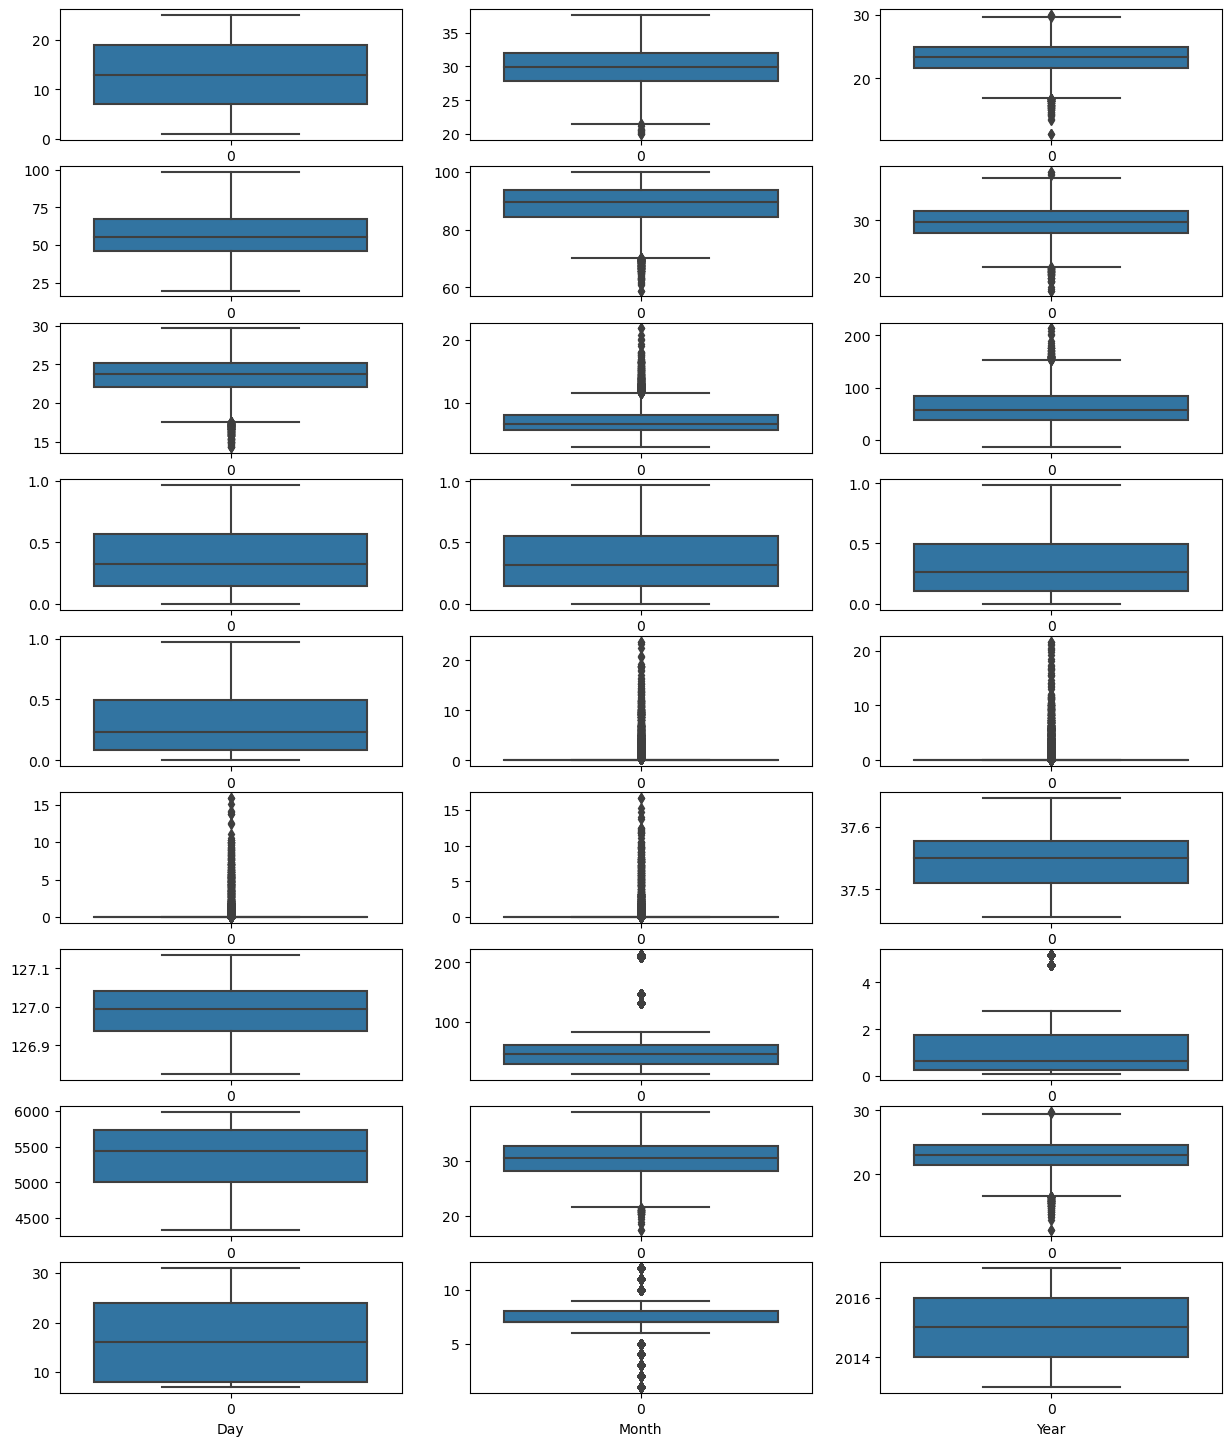

In [45]:
plt.figure(figsize=(15,20))

plotnumber = 1

for c in df:
    if plotnumber <=28:
        ax = plt.subplot(10,3,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
#From Boxplot we can see outliers exist dataset.

In [46]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [47]:
df.shape
#data before treating ouliers

(7752, 27)

In [48]:
df1.shape
#data after treating outliers

(6894, 27)

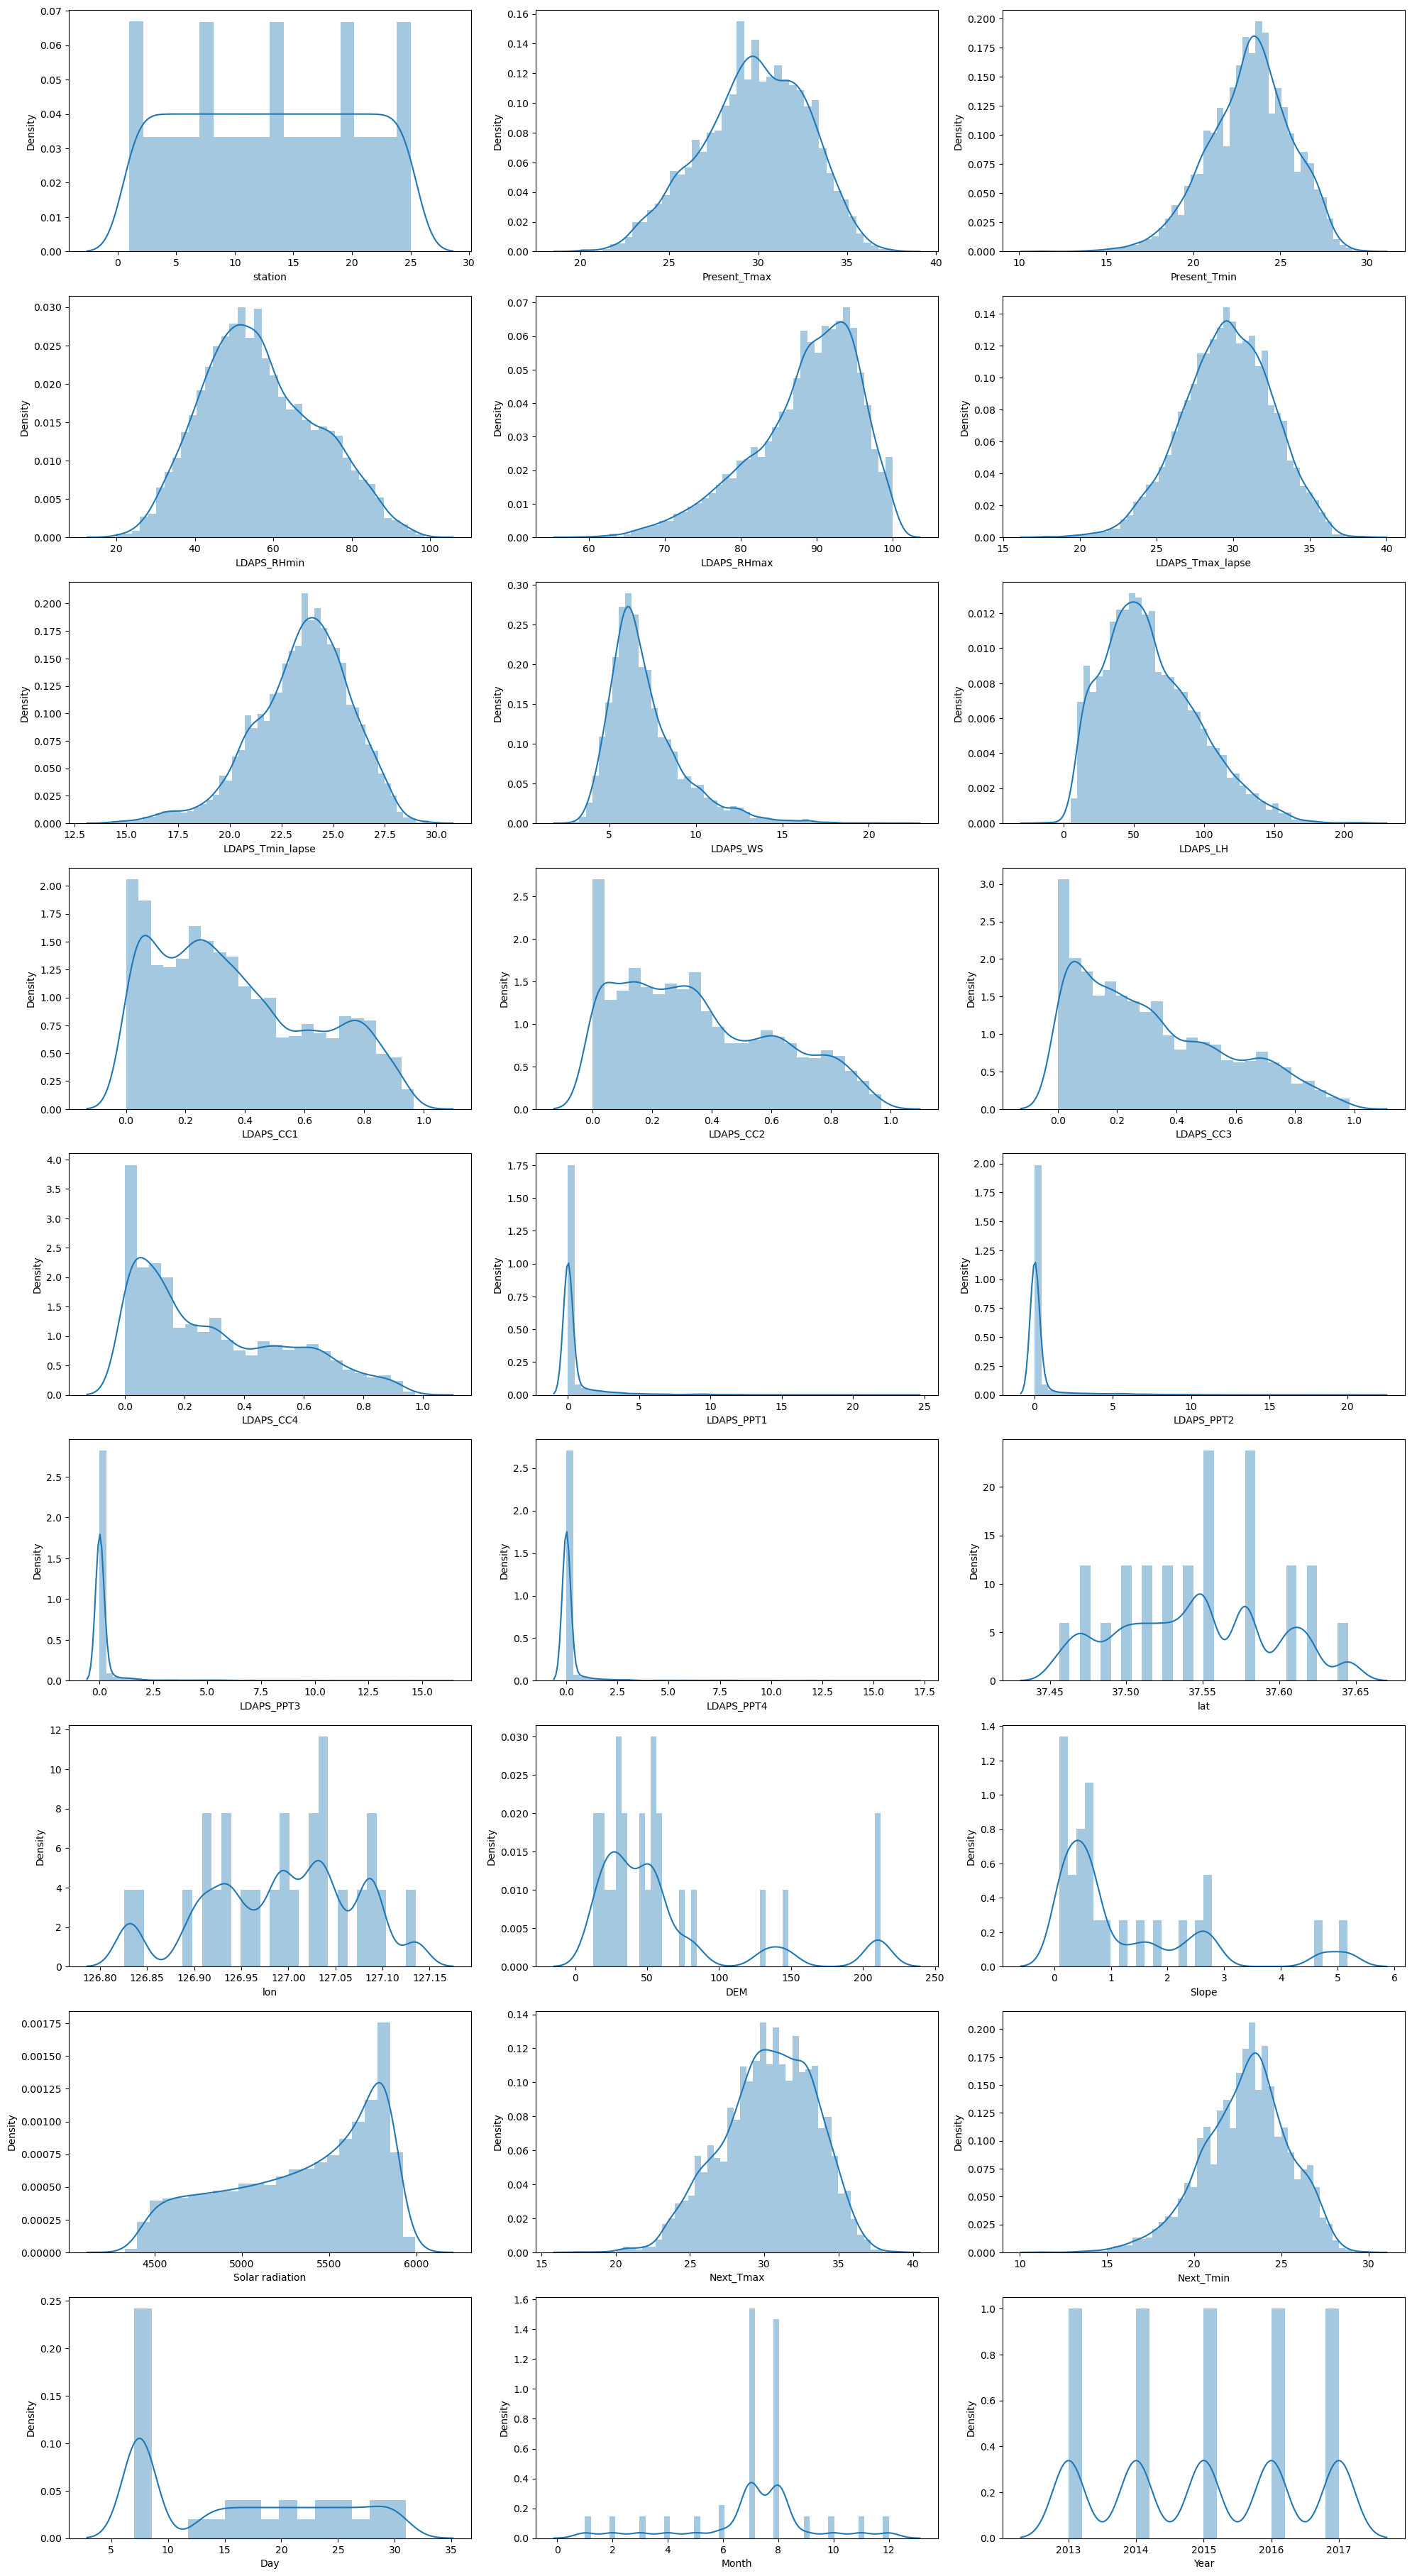

In [49]:
plt.figure(figsize=(20,40))
plotnumber = 1

for column in df:
    if plotnumber<=29:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)

        
        
    plotnumber+=1
plt.tight_layout()

In [50]:
#Skewness is important feature for continous data. 
#There is no relevence of skweness for discrete numerical feature like month and categorical feature.
#So we gone ignore skewness present in discrete numerical and categorical feature.

In [51]:
df.skew()

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Day                 0.245514
Month              -0.705332
Year                0.000000
dtype: float64

In [52]:
#Here some are positively skewed while others are negatively skewed. We gone use yeo-johnson method for transfromation.

# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
#PowerTransformer method to remove skewness

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [53]:
df.skew()
#it has been treated

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.115143
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.017827
LDAPS_WS            0.002408
LDAPS_LH            0.057403
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.087933
LDAPS_CC4           0.126895
LDAPS_PPT1          1.404189
LDAPS_PPT2          1.577808
LDAPS_PPT3          1.747820
LDAPS_PPT4          1.963848
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Day                 0.245514
Month               0.043842
Year                0.000000
dtype: float64

In [54]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000e+00      0.112756      0.132068    -0.066780   
Present_Tmax      1.127558e-01      1.000000      0.618760    -0.204571   
Present_Tmin      1.320681e-01      0.618760      1.000000     0.123143   
LDAPS_RHmin      -6.677992e-02     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -1.734153e-01     -0.329381     -0.036298     0.598904   
LDAPS_Tmax_lapse  6.930642e-02      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  1.096272e-01      0.629714      0.758322     0.070416   
LDAPS_WS          1.614242e-02     -0.095484      0.002683     0.236196   
LDAPS_LH         -1.331979e-01      0.127447     -0.007388    -0.041692   
LDAPS_CC1         6.727533e-03     -0.311805      0.084447     0.613818   
LDAPS_CC2         3.180711e-03     -0.213791      0.090263     0.745443   
LDAPS_CC3         1.071613e-03     -0.130892      0.006982     0.673739   
LDAPS_CC4         7.284563e-03     -0.124776     -0.028821     0.509586   
LDAPS_PPT1       -5.787580e-03     -0.173367      0.106161     0.436430   
LDAPS_PPT2       -8.386184e-03     -0.139715      0.090689     0.572649   
LDAPS_PPT3       -1.297892e-02     -0.093101      0.014168     0.443184   
LDAPS_PPT4       -6.285244e-03     -0.089738     -0.069126     0.299359   
lat              -2.374669e-01     -0.052615     -0.078475     0.087099   
lon              -1.186031e-01      0.009020     -0.043461    -0.076237   
DEM              -3.181066e-01     -0.149383     -0.247869     0.067065   
Slope            -1.397871e-01     -0.107196     -0.166870     0.090630   
Solar radiation  -2.156705e-02     -0.069058     -0.015412     0.229129   
Next_Tmax         1.082362e-01      0.610348      0.471806    -0.437898   
Next_Tmin         1.286594e-01      0.622741      0.796670     0.095019   
Day               2.924174e-17     -0.143807     -0.108272    -0.065837   
Month             3.760643e-05      0.012763      0.000413    -0.046874   
Year              1.435051e-15      0.059800      0.037396    -0.002045   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.173415          0.069306          0.109627  0.016142   
Present_Tmax        -0.329381          0.570129          0.629714 -0.095484   
Present_Tmin        -0.036298          0.464151          0.758322  0.002683   
LDAPS_RHmin          0.598904         -0.564580          0.070416  0.236196   
LDAPS_RHmax          1.000000         -0.400957         -0.171130  0.117966   
LDAPS_Tmax_lapse    -0.400957          1.000000          0.653359 -0.226884   
LDAPS_Tmin_lapse    -0.171130          0.653359          1.000000 -0.056562   
LDAPS_WS             0.117966         -0.226884         -0.056562  1.000000   
LDAPS_LH             0.242197          0.026233         -0.136643 -0.021014   
LDAPS_CC1            0.459925         -0.438439         -0.005148  0.244434   
LDAPS_CC2            0.410210         -0.523619          0.033746  0.205522   
LDAPS_CC3            0.206621         -0.508039         -0.025666  0.129025   
LDAPS_CC4            0.122150         -0.403799         -0.064302  0.139884   
LDAPS_PPT1           0.441183         -0.285984         -0.043551  0.238695   
LDAPS_PPT2           0.392293         -0.399331         -0.025541  0.235672   
LDAPS_PPT3           0.254599         -0.330243         -0.081122  0.160048   
LDAPS_PPT4           0.173467         -0.272765         -0.145232  0.236807   
lat                  0.233527         -0.042093         -0.096292  0.006076   
lon                  0.017140          0.090666         -0.027988 -0.066916   
DEM                  0.185210         -0.130237         -0.192144  0.137995   
Slope                0.218791         -0.123512         -0.175184  0.124027   
Solar radiation      0.163964         -0.003435          0.046365  0.168398   
Next_Tmax           -0.317611          0.827189          0.586198 -0.262328   
Next_Tmin           -0.094

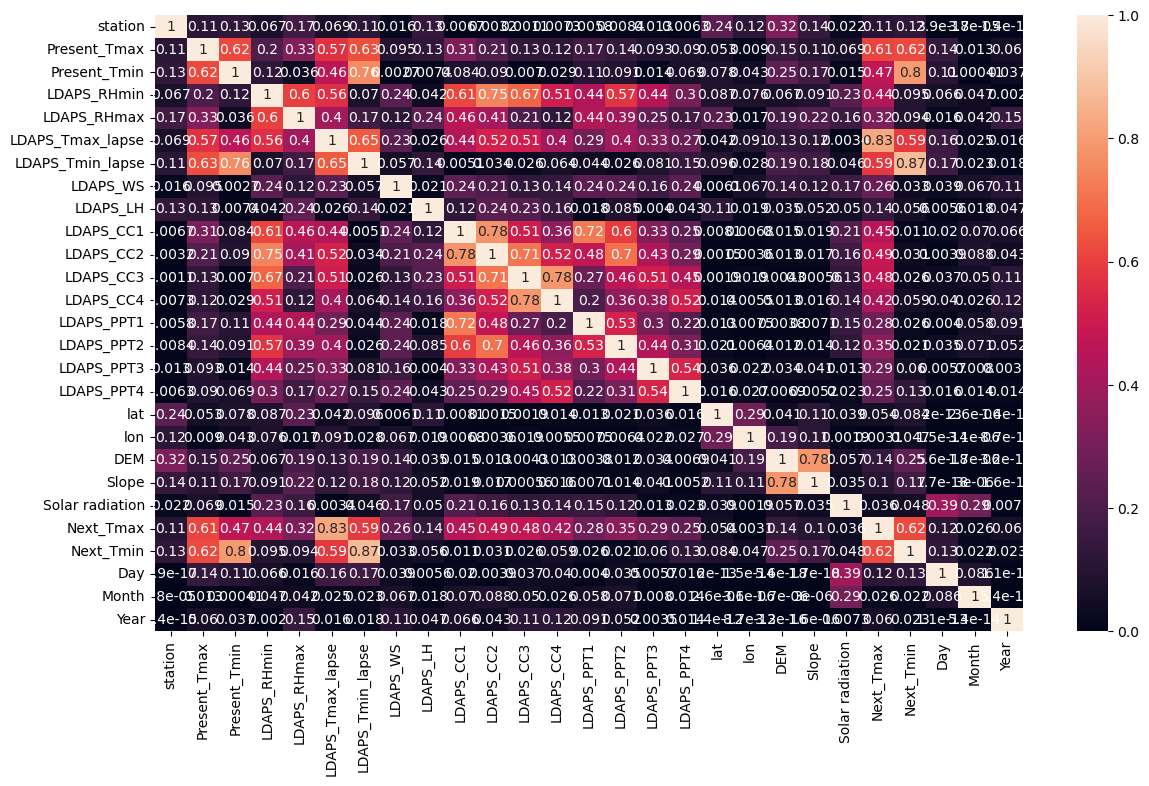

In [55]:

df_corr = df.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True)
plt.show()
#Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.
#Temperature related feature are moderately or highly correlated with Target Feature.

In [56]:
# Splitting data in target and dependent feature
x = df.drop(['Next_Tmax'], axis =1)
y = df['Next_Tmax']

In [57]:
scaler= StandardScaler()
X_scaler = scaler.fit_transform(x)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

VIF          Features
0   5.463339e+00           station
1   3.019279e+02      Present_Tmax
2   3.312284e+02      Present_Tmin
3   1.068683e+02       LDAPS_RHmin
4   2.671883e+00       LDAPS_RHmax
5   8.761459e+02  LDAPS_Tmax_lapse
6   8.163512e+00  LDAPS_Tmin_lapse
7   1.320720e+00          LDAPS_WS
8   1.514266e+00          LDAPS_LH
9   1.519613e+01         LDAPS_CC1
10  1.798883e+01         LDAPS_CC2
11  5.057410e+00         LDAPS_CC3
12  3.123441e+00         LDAPS_CC4
13  2.621663e+00        LDAPS_PPT1
14  2.413614e+00        LDAPS_PPT2
15  1.848810e+00        LDAPS_PPT3
16  1.874408e+00        LDAPS_PPT4
17  7.146709e+05               lat
18  1.713692e+06               lon
19  3.359239e+00               DEM
20  2.904301e+00             Slope
21  1.525952e+00   Solar radiation
22  4.547869e+02         Next_Tmax
23  5.618334e+02         Next_Tmin
24  6.297784e+00               Day
25  1.121203e+00             Month
26  1.285643e+06              Year

In [59]:
#Independent feature VIF is within permissible limit of 10

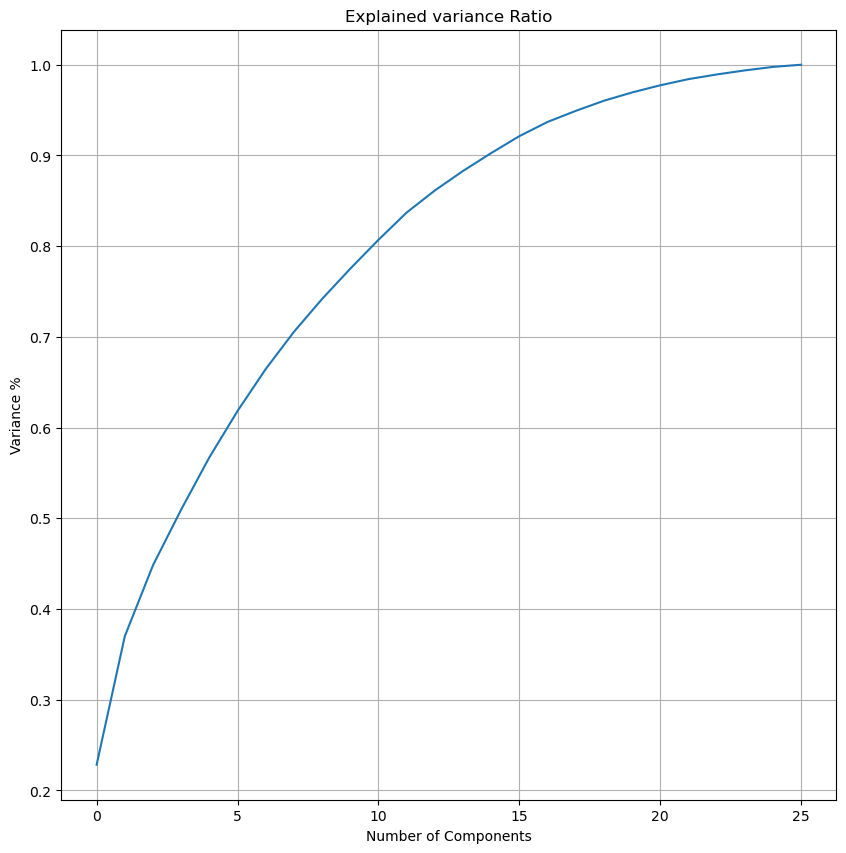

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scaler)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [61]:
#AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data. 
#We shall pick the first 15 components for our prediction.

pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scaler)
#15 feature taken

In [62]:
x_new=pd.DataFrame(x_new,columns=np.arange(15))

In [63]:
#train test split , splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=12)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge,LassoCV , RidgeCV,Lasso 

from xgboost import XGBRegressor    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
#all the necassary liabraries that required for building a model

In [65]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.7662795224655468
mean_squared_error: 2.4431138767997957
Squareroot_mean_squared_error 1.5630463450581995
Root Mean Squared Log Error   0.44663670234856306


In [66]:
test_score =  LinearRegression.score(x_train,y_train)
test_score
#test score

0.7430087870897684

In [67]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)
#copmring acutal  vs predcted 


Actual    Predict
1722    34.1  32.599373
5598    35.8  35.816354
5505    35.5  35.497017
6853    30.5  31.737318
7211    24.5  29.490307
...      ...        ...
3200    25.9  27.587083
1266    31.8  33.272123
6827    32.1  32.985971
1418    31.7  32.347279
913     28.8  29.934585

[1551 rows x 2 columns]

In [68]:
lin_reg=LinearRegression
maxR2_score=0
maxRS=0
for i in range(1,250):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=.25)
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)
#R2 with 2 different tecniques also 

Best R2 Score is 0.8116439749231044 on Random_state 229


In [69]:
cv_score = (cross_val_score(lin_reg, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check       

Cross Validation Score: 70.59417680323288


In [70]:
# Ridge:
from sklearn.linear_model import RidgeCV
Ridge = RidgeCV()
Ridge = Ridge.fit(x_train, y_train)

# Prediction:
y_pred = Ridge.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.7924325816803309
mean_squared_error: 2.1522013448082835
Squareroot_mean_squared_error 1.4670382901643308
Root Mean Squared Log Error   0.38324559981840006


In [71]:
cv_score = (cross_val_score(Ridge, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 70.59791232016448


In [72]:
#RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(x_test)
# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))



r2_score: 0.909864523997831
mean_squared_error: 0.9345864309399682
Squareroot_mean_squared_error 0.9667401051678617
Root Mean Squared Log Error   -0.03382558369801604


In [73]:
cv_score = (cross_val_score(RandomForestRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 69.8088375927975


In [155]:
#hyper parameter tunning  for RandomForestRegressor


#hyper parameter tunning 
grid_params = {'criterion':['mse','mae'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=RandomForestRegressor,
                   param_grid = grid_params,
                   cv = 5)

In [ ]:

GCV = GridSearchCV(RandomForestRegressor,grid_params,cv=5)
GCV.fit(x_train,y_train)


In [157]:
GCV.best_score_

0.99980009241145

In [156]:
##hyper parameter tunning 
from sklearn.ensemble import RandomForestRegressor 
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'mse', max_depth= 20, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print(' R2 Score of Final Model' )
print(r2_score(y_test,y_pred)) 
print('\n')

Mean absolute error : 0.0018850992121881912
Mean squared error : 0.00039538977363377814
Root Mean Squared Error: 0.019884410316470993


 R2 Score of Final Model
0.9999379738772886




In [74]:
#Decision_Tree
Decision_Tree = DecisionTreeRegressor()
Decision_Tree = Decision_Tree.fit(x_train, y_train)

# Prediction:
y_pred = Decision_Tree.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

 

r2_score: 0.8133062900512036
mean_squared_error: 1.9357684210353379
Squareroot_mean_squared_error 1.3913189501459893
Root Mean Squared Log Error   0.3302521822329301


In [75]:
cv_score = (cross_val_score(Decision_Tree, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 46.924165579493895


In [76]:
#KNeighborsRegressor
KNeighborsRegressor = KNeighborsRegressor()
KNeighborsRegressor = KNeighborsRegressor.fit(x_train, y_train)

# Prediction:
y_pred = KNeighborsRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))



r2_score: 0.8245964660625349
mean_squared_error: 1.8187041332419251
Squareroot_mean_squared_error 1.3485933906266652
Root Mean Squared Log Error   0.29906211639180524


In [77]:
cv_score = (cross_val_score(KNeighborsRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 54.00582755130081


In [78]:
#GradientBoostingRegressor
GradientBoostingRegressor = GradientBoostingRegressor()
GradientBoostingRegressor = GradientBoostingRegressor.fit(x_train, y_train)

# Prediction:
y_pred = GradientBoostingRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))



r2_score: 0.8615711349546127
mean_squared_error: 1.4353254085963427
Squareroot_mean_squared_error 1.198050670295853
Root Mean Squared Log Error   0.18069579453826137


In [79]:
cv_score = (cross_val_score(GradientBoostingRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 71.59004437534382


In [80]:
#AdaBoostRegressor
AdaBoostRegressor = AdaBoostRegressor()
AdaBoostRegressor = AdaBoostRegressor.fit(x_train, y_train)

# Prediction:
y_pred = AdaBoostRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.7720450095926357
mean_squared_error: 2.363593674200452
Squareroot_mean_squared_error 1.5373983459729792
Root Mean Squared Log Error   0.430091602072409


In [81]:
cv_score = (cross_val_score(AdaBoostRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 66.089400268537


In [82]:
#XGBRegressor
XGBRegressor = XGBRegressor()
XGBRegressor = XGBRegressor.fit(x_train, y_train)

# Prediction:
y_pred = XGBRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score: 0.9333665811079022
mean_squared_error: 0.6909009848929522
Squareroot_mean_squared_error 0.83120453854208


In [83]:
cv_score = (cross_val_score(XGBRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 67.36753558480244


In [137]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators' : [100, 200]}


In [139]:
GCV = GridSearchCV(XGBRegressor,param_grid,verbose =10)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 1/5; 1/36] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=-9.674 total time=   0.4s
[CV 2/5; 1/36] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 2/5; 1/36] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=-10.649 total time=   0.4s
[CV 3/5; 1/36] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 3/5; 1/36] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=-10.783 total time=   0.4s
[CV 4/5; 1/36] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 4/5; 1/36] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=-9.735 total time=   0.4s
[CV 5/5; 1/36] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_esti

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                        

In [147]:
##hyper parameter tunning 
from xgboost import XGBRegressor    
Final_mod =  XGBRegressor(n_estimators = 200 , max_depth= 7, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print(' R2 Score of Final Model' )
print(r2_score(y_test,y_pred)) 


[21:18:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Mean absolute error : 0.003492478133248947
Mean squared error : 0.0005407430814858075
Root Mean Squared Error: 0.02325388314853688


 R2 Score of Final Model
0.9999151718153473


In [158]:
#Machine Learning Model Building For Next_Tmin

In [94]:

# Splitting data in target and dependent feature
Xx= df.drop(['Next_Tmin'], axis =1)
y = df['Next_Tmin']

In [97]:

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

In [98]:
#train test split , splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

In [100]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 1.0
mean_squared_error: 2.0747448856283315e-28
Squareroot_mean_squared_error 1.4403974748757133e-14
Root Mean Squared Log Error   -31.87127220219716


In [101]:
test_score =  LinearRegression.score(x_train,y_train)
test_score
#test score

1.0

In [102]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)
#copmring acutal  vs predcted 


Actual  Predict
2889    22.0     22.0
5679    24.9     24.9
7569    23.1     23.1
7476    22.8     22.8
3221    18.5     18.5
...      ...      ...
2951    19.0     19.0
5242    27.9     27.9
5505    26.5     26.5
2049    25.2     25.2
1347    22.5     22.5

[1938 rows x 2 columns]

In [103]:
cv_score = (cross_val_score(LinearRegression, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 100.0


In [105]:
#XGBRegressor
XGBRegressor = XGBRegressor.fit(x_train, y_train)

# Prediction:
y_pred = XGBRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score: 0.9999214423100663
mean_squared_error: 0.0005007713828025668
Squareroot_mean_squared_error 0.022377921771303225


In [107]:
cv_score = (cross_val_score(XGBRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 99.98344440383153


In [109]:
#AdaBoostRegressor
AdaBoostRegressor = AdaBoostRegressor.fit(x_train, y_train)

# Prediction:
y_pred = AdaBoostRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.9909990116692493
mean_squared_error: 0.05737741749767305
Squareroot_mean_squared_error 0.23953583760613578
Root Mean Squared Log Error   -1.4290522382266937


In [110]:
cv_score = (cross_val_score(AdaBoostRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 99.00969296390892


In [112]:
#GradientBoostingRegressor
GradientBoostingRegressor = GradientBoostingRegressor.fit(x_train, y_train)

# Prediction:
y_pred = GradientBoostingRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))



r2_score: 0.9999631326026598
mean_squared_error: 0.0002350137531022654
Squareroot_mean_squared_error 0.01533015828692794
Root Mean Squared Log Error   -4.1779332608465705


In [113]:
cv_score = (cross_val_score(GradientBoostingRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 99.98889580190152


In [114]:
#KNeighborsRegressor
KNeighborsRegressor = KNeighborsRegressor.fit(x_train, y_train)

# Prediction:
y_pred = KNeighborsRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))



r2_score: 0.8869314172790392
mean_squared_error: 0.7207634359981111
Squareroot_mean_squared_error 0.8489778772136004
Root Mean Squared Log Error   -0.1637221504736595


In [115]:
cv_score = (cross_val_score(KNeighborsRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 74.44812821238378


In [116]:
#Decision_Tree
Decision_Tree = DecisionTreeRegressor()
Decision_Tree = Decision_Tree.fit(x_train, y_train)

# Prediction:
y_pred = Decision_Tree.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))



r2_score: 0.9991217358269855
mean_squared_error: 0.005598555211558307
Squareroot_mean_squared_error 0.07482349371392856
Root Mean Squared Log Error   -2.5926233562321217


In [117]:
cv_score = (cross_val_score(Decision_Tree, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 99.97451307216367


In [118]:
#RandomForestRegressor
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(x_test)
# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))



r2_score: 0.9999814304194342
mean_squared_error: 0.00011837306501548545
Squareroot_mean_squared_error 0.010879938649435733
Root Mean Squared Log Error   -4.5208346764088665


In [119]:
cv_score = (cross_val_score(RandomForestRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 99.98014361169271


In [148]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators' : [100, 200]}

In [150]:
GCV = GridSearchCV(XGBRegressor(),param_grid,verbose =10)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 1/5; 1/36] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=-9.674 total time=   0.5s
[CV 2/5; 1/36] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 2/5; 1/36] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=-10.649 total time=   0.5s
[CV 3/5; 1/36] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 3/5; 1/36] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=-10.783 total time=   0.5s
[CV 4/5; 1/36] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100
[CV 4/5; 1/36] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=-9.735 total time=   0.5s
[CV 5/5; 1/36] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_esti

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                        

In [154]:
##hyper parameter tunning 
from xgboost import XGBRegressor 
Final_mod =  XGBRegressor(n_estimators = 200 , max_depth= 7, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print(' R2 Score of Final Model' )
print(r2_score(y_test,y_pred)) 


[21:40:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Mean absolute error : 0.003492478133248947
Mean squared error : 0.0005407430814858075
Root Mean Squared Error: 0.02325388314853688


 R2 Score of Final Model
0.9999151718153473


In [159]:



#we have selected RandomForestRegressor as a best model because it has given best r2 score as well as best hyperparameter tuning resULTS AS A OUTPUT

In [ ]:
# FOR Next_Tmin WE HAVE SELECTED  XGBRegressor AS GIVEN HIGEST cv SCORE AS WELL AS MODEL AND HYPERPARAMETERTUNING.